# Detailed Analysis of Full Comparison Experiments

This notebook provides a comprehensive analysis of the experimental results from:
- **Cardio Train Dataset**: `cardio_train/full_comparison_20251019_081844.csv`
- **Credit Card Dataset**: `creditcard/full_comparison_20251019_163508.csv`

## Objectives
1. Load and explore both datasets
2. Compare model performance across datasets
3. Analyze the impact of different techniques (scaling, balancing, feature selection)
4. Identify best performing configurations
5. Provide insights and answer "why" questions

In [29]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

## 1. Load Data

In [30]:
# Load the experiment results
cardio_path = r'E:\thong\code\cls_review\experiments\full_comparison\cardio_train\full_comparison_20251019_081844.csv'
creditcard_path = r'E:\thong\code\cls_review\experiments\full_comparison\creditcard\full_comparison_20251019_163508.csv'

df_cardio = pd.read_csv(cardio_path)
df_creditcard = pd.read_csv(creditcard_path)

# Add dataset identifier
df_cardio['dataset'] = 'cardio_train'
df_creditcard['dataset'] = 'creditcard'

print("Cardio Train Dataset Shape:", df_cardio.shape)
print("Credit Card Dataset Shape:", df_creditcard.shape)

Cardio Train Dataset Shape: (270, 27)
Credit Card Dataset Shape: (270, 27)


## 2. Data Overview

In [31]:
# Display first few rows of each dataset
print("="*80)
print("CARDIO TRAIN - First 5 rows")
print("="*80)
display(df_cardio.head())

print("\n" + "="*80)
print("CREDIT CARD - First 5 rows")
print("="*80)
display(df_creditcard.head())

CARDIO TRAIN - First 5 rows


,model,generation,scaler,imbalance,feature_selection,accuracy,accuracy_std,balanced_accuracy,balanced_accuracy_std,sensitivity,...,f1,f1_std,roc_auc,roc_auc_std,pr_auc,pr_auc_std,mcc,mcc_std,train_time_sec,dataset
0,Gen1_LogisticRegression,1,standard,none,none,0.724304,0.002584,0.724260,0.002588,0.652503,...,0.702848,0.002930,0.783659,0.002590,0.758034,0.003978,0.453236,0.005235,0.222602,cardio_train
1,Gen1_LogisticRegression,1,standard,none,select_k_best_5,0.721607,0.002304,0.721562,0.002305,0.647250,...,0.699108,0.003215,0.779269,0.001932,0.753015,0.004148,0.448125,0.004398,0.268563,cardio_train
2,Gen1_LogisticRegression,1,standard,none,select_k_best_12,0.723696,0.002453,0.723653,0.002457,0.652289,...,0.702320,0.002746,0.783387,0.002626,0.757829,0.004232,0.451957,0.004982,0.267321,cardio_train
3,Gen1_LogisticRegression,1,standard,none,mutual_info_5,0.699536,0.002786,0.699446,0.002788,0.552085,...,0.647408,0.004793,0.755337,0.001884,0.759479,0.005371,0.417481,0.005069,7.889068,cardio_train
4,Gen1_LogisticRegression,1,standard,none,mutual_info_12,0.723339,0.001853,0.723295,0.001856,0.650609,...,0.701511,0.002039,0.782895,0.002761,0.757770,0.003991,0.451409,0.003807,7.763079,cardio_train



CREDIT CARD - First 5 rows


,model,generation,scaler,imbalance,feature_selection,accuracy,accuracy_std,balanced_accuracy,balanced_accuracy_std,sensitivity,...,f1,f1_std,roc_auc,roc_auc_std,pr_auc,pr_auc_std,mcc,mcc_std,train_time_sec,dataset
0,Gen1_LogisticRegression,1,standard,none,none,0.976155,0.001936,0.945012,0.010648,0.913762,...,0.117468,0.006178,0.982485,0.010166,0.773542,0.043812,0.235940,0.004805,2.088695,creditcard
1,Gen1_LogisticRegression,1,standard,none,select_k_best_5,0.977801,0.001916,0.925603,0.019795,0.873223,...,0.120131,0.005426,0.959156,0.013075,0.716971,0.044646,0.233751,0.004641,1.313764,creditcard
2,Gen1_LogisticRegression,1,standard,none,select_k_best_12,0.973864,0.001774,0.936283,0.017716,0.898572,...,0.106525,0.005206,0.978731,0.012160,0.750369,0.049782,0.221820,0.007110,1.438603,creditcard
3,Gen1_LogisticRegression,1,standard,none,mutual_info_5,0.977722,0.001432,0.926827,0.018966,0.875755,...,0.119829,0.003152,0.957202,0.010535,0.718357,0.039611,0.233818,0.004055,74.230696,creditcard
4,Gen1_LogisticRegression,1,standard,none,mutual_info_12,0.974316,0.001240,0.937773,0.017079,0.901104,...,0.108281,0.002998,0.978848,0.011258,0.745857,0.057671,0.224181,0.005598,73.406427,creditcard


In [32]:
# Column information
print("Cardio Train Columns:")
print(df_cardio.columns.tolist())
print("\nCredit Card Columns:")
print(df_creditcard.columns.tolist())

# Data types and missing values
print("\n" + "="*80)
print("Cardio Train - Data Info:")
print("="*80)
print(df_cardio.info())

print("\n" + "="*80)
print("Credit Card - Data Info:")
print("="*80)
print(df_creditcard.info())

Cardio Train Columns:
['model', 'generation', 'scaler', 'imbalance', 'feature_selection', 'accuracy', 'accuracy_std', 'balanced_accuracy', 'balanced_accuracy_std', 'sensitivity', 'sensitivity_std', 'specificity', 'specificity_std', 'precision', 'precision_std', 'npv', 'npv_std', 'f1', 'f1_std', 'roc_auc', 'roc_auc_std', 'pr_auc', 'pr_auc_std', 'mcc', 'mcc_std', 'train_time_sec', 'dataset']

Credit Card Columns:
['model', 'generation', 'scaler', 'imbalance', 'feature_selection', 'accuracy', 'accuracy_std', 'balanced_accuracy', 'balanced_accuracy_std', 'sensitivity', 'sensitivity_std', 'specificity', 'specificity_std', 'precision', 'precision_std', 'npv', 'npv_std', 'f1', 'f1_std', 'roc_auc', 'roc_auc_std', 'pr_auc', 'pr_auc_std', 'mcc', 'mcc_std', 'train_time_sec', 'dataset']

Cardio Train - Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --

In [33]:
# Statistical summary
print("Cardio Train - Statistical Summary:")
display(df_cardio.describe())

print("\nCredit Card - Statistical Summary:")
display(df_creditcard.describe())

Cardio Train - Statistical Summary:


,generation,accuracy,accuracy_std,balanced_accuracy,balanced_accuracy_std,sensitivity,sensitivity_std,specificity,specificity_std,precision,...,npv_std,f1,f1_std,roc_auc,roc_auc_std,pr_auc,pr_auc_std,mcc,mcc_std,train_time_sec
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.222222,0.719445,0.004580,0.719408,0.004580,0.657093,0.013646,0.781722,0.013825,0.753611,...,0.005536,0.699563,0.006088,0.775273,0.003211,0.764236,0.004453,0.444520,0.008225,238.363777
std,1.032316,0.017006,0.008899,0.017012,0.008887,0.049842,0.023420,0.042183,0.035932,0.025019,...,0.007384,0.026950,0.009747,0.024034,0.004151,0.017584,0.003440,0.030410,0.015385,444.889622
min,1.000000,0.661589,0.000848,0.661527,0.000848,0.492443,0.000940,0.584346,0.001450,0.663990,...,0.000314,0.604512,0.000614,0.700023,0.000667,0.706833,0.000970,0.331813,0.001832,0.222602
25%,1.000000,0.714911,0.002060,0.714857,0.002060,0.638477,0.004976,0.766044,0.003510,0.746634,...,0.002599,0.687590,0.002754,0.756858,0.001722,0.754229,0.002874,0.436515,0.004012,9.891138
50%,2.000000,0.725232,0.002663,0.725215,0.002663,0.683433,0.006917,0.777689,0.005209,0.756193,...,0.003475,0.710990,0.003820,0.781335,0.002248,0.763511,0.003919,0.454486,0.005129,24.353479
75%,3.000000,0.730737,0.003439,0.730709,0.003441,0.691706,0.009398,0.803405,0.009035,0.761817,...,0.004795,0.718119,0.004793,0.794758,0.003017,0.779247,0.004922,0.463561,0.006606,244.100628
max,4.000000,0.737321,0.069863,0.737295,0.069743,0.745965,0.173928,0.893994,0.308875,0.823612,...,0.056450,0.726014,0.116853,0.803511,0.042794,0.802251,0.039472,0.476420,0.126309,2128.712537



Credit Card - Statistical Summary:


,generation,accuracy,accuracy_std,balanced_accuracy,balanced_accuracy_std,sensitivity,sensitivity_std,specificity,specificity_std,precision,...,npv_std,f1,f1_std,roc_auc,roc_auc_std,pr_auc,pr_auc_std,mcc,mcc_std,train_time_sec
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.222222,0.990866,0.000913,0.904336,0.011120,0.817505,0.022771,0.991166,0.000927,0.374375,...,0.000040,0.436552,0.015339,0.939689,0.011377,0.695383,0.023515,0.494147,0.014048,735.043071
std,1.032316,0.010075,0.001681,0.027922,0.013845,0.060809,0.027695,0.010151,0.001690,0.300655,...,0.000048,0.267691,0.025356,0.044640,0.023888,0.150010,0.031062,0.223152,0.023470,1728.217650
min,1.000000,0.962014,0.000000,0.738480,0.000000,0.477215,0.000000,0.962168,0.000000,0.038547,...,0.000000,0.073836,0.000000,0.611024,0.000000,0.077770,0.000000,0.178064,0.000000,0.882601
25%,1.000000,0.982466,0.000000,0.894620,0.000000,0.789338,0.000000,0.982668,0.000000,0.083119,...,0.000000,0.151016,0.000000,0.922810,0.000000,0.688979,0.000000,0.260660,0.000000,35.602062
50%,2.000000,0.996149,0.000137,0.910359,0.010981,0.831305,0.023045,0.996494,0.000116,0.285360,...,0.000041,0.421628,0.006060,0.948174,0.010069,0.747029,0.018907,0.482106,0.006776,103.834338
75%,3.000000,0.998822,0.001310,0.922318,0.018267,0.852864,0.036840,0.999149,0.001372,0.621429,...,0.000065,0.702656,0.021885,0.964839,0.014872,0.778405,0.037753,0.708763,0.020846,783.892702
max,4.000000,0.999561,0.009376,0.947592,0.119170,0.921357,0.238284,0.999956,0.009445,0.967213,...,0.000414,0.861488,0.237002,0.985087,0.238150,0.869350,0.225993,0.865937,0.228837,21815.458244


## 3. Identify Available Techniques and Models

In [34]:
# Extract unique values for each categorical column
def analyze_techniques(df, dataset_name):
    print(f"\n{'='*80}")
    print(f"Analysis for {dataset_name}")
    print(f"{'='*80}")
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        unique_vals = df[col].unique()
        print(f"\n{col}: ({len(unique_vals)} unique values)")
        print(unique_vals)

analyze_techniques(df_cardio, "Cardio Train")
analyze_techniques(df_creditcard, "Credit Card")


Analysis for Cardio Train

model: (13 unique values)
['Gen1_LogisticRegression' 'Gen1_DecisionTree' 'Gen1_KNN'
 'Gen2_RandomForest' 'Gen2_ExtraTrees' 'Gen2_GradientBoosting'
 'Gen2_SVM_RBF' 'Gen2_MLP_Sklearn' 'Gen3_XGBoost' 'Gen3_LightGBM'
 'Gen3_CatBoost' 'Gen4_PyTorch_MLP' 'Gen4_TabNet']

scaler: (3 unique values)
['standard' 'robust' 'none']

imbalance: (3 unique values)
['none' 'smote' 'smote_enn']

feature_selection: (5 unique values)
['none' 'select_k_best_5' 'select_k_best_12' 'mutual_info_5'
 'mutual_info_12']

dataset: (1 unique values)
['cardio_train']

Analysis for Credit Card

model: (13 unique values)
['Gen1_LogisticRegression' 'Gen1_DecisionTree' 'Gen1_KNN'
 'Gen2_RandomForest' 'Gen2_ExtraTrees' 'Gen2_GradientBoosting'
 'Gen2_SVM_RBF' 'Gen2_MLP_Sklearn' 'Gen3_XGBoost' 'Gen3_LightGBM'
 'Gen3_CatBoost' 'Gen4_PyTorch_MLP' 'Gen4_TabNet']

scaler: (3 unique values)
['standard' 'robust' 'none']

imbalance: (3 unique values)
['none' 'smote' 'smote_enn']

feature_selection: (5 u

## 4. Performance Metrics Analysis

In [35]:
# Identify metric columns (numeric columns excluding training time)
def get_metric_columns(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    # Common metric names
    metric_keywords = ['accuracy', 'precision', 'recall', 'f1', 'auc', 'roc']
    metrics = [col for col in numeric_cols if any(keyword in col.lower() for keyword in metric_keywords)]
    return metrics

cardio_metrics = get_metric_columns(df_cardio)
creditcard_metrics = get_metric_columns(df_creditcard)

print("Cardio Train Metrics:", cardio_metrics)
print("\nCredit Card Metrics:", creditcard_metrics)

Cardio Train Metrics: ['accuracy', 'accuracy_std', 'balanced_accuracy', 'balanced_accuracy_std', 'precision', 'precision_std', 'f1', 'f1_std', 'roc_auc', 'roc_auc_std', 'pr_auc', 'pr_auc_std']

Credit Card Metrics: ['accuracy', 'accuracy_std', 'balanced_accuracy', 'balanced_accuracy_std', 'precision', 'precision_std', 'f1', 'f1_std', 'roc_auc', 'roc_auc_std', 'pr_auc', 'pr_auc_std']


## 5. Best Model Performance by Dataset

In [36]:
# Function to find best performing configurations
def find_best_configs(df, dataset_name, metric_col='f1', top_n=10):
    """
    Find the best performing configurations based on a specific metric
    """
    print(f"\n{'='*80}")
    print(f"Top {top_n} Configurations for {dataset_name} (by {metric_col})")
    print(f"{'='*80}")
    
    # Check if metric exists
    if metric_col not in df.columns:
        # Try to find similar column
        similar_cols = [col for col in df.columns if 'f1' in col.lower() and 'std' not in col.lower()]
        if similar_cols:
            metric_col = similar_cols[0]
            print(f"Using {metric_col} instead")
        else:
            print(f"Metric {metric_col} not found!")
            return None
    
    # Sort by metric and get top N
    best_configs = df.nlargest(top_n, metric_col)
    
    # Display key columns
    display_cols = ['model', 'scaler', 'imbalance', 'feature_selection', metric_col]
    # Add other metric columns if available
    other_metrics = ['accuracy', 'balanced_accuracy', 'roc_auc', 'pr_auc', 'mcc']
    for m in other_metrics:
        if m in df.columns and m != metric_col:
            display_cols.append(m)
    
    # Filter to only existing columns
    display_cols = [col for col in display_cols if col in df.columns]
    
    display(best_configs[display_cols])
    
    return best_configs

# Find best configurations for both datasets
best_cardio = find_best_configs(df_cardio, "Cardio Train")
best_creditcard = find_best_configs(df_creditcard, "Credit Card")


Top 10 Configurations for Cardio Train (by f1)


,model,scaler,imbalance,feature_selection,f1,accuracy,balanced_accuracy,roc_auc,pr_auc,mcc
202,Gen3_LightGBM,none,smote,select_k_best_12,0.726014,0.736571,0.736548,0.801809,0.785297,0.474496
112,Gen2_GradientBoosting,none,smote,select_k_best_12,0.725955,0.737161,0.737136,0.802857,0.785858,0.475858
114,Gen2_GradientBoosting,none,smote,mutual_info_12,0.725552,0.736929,0.736904,0.802544,0.785497,0.475437
200,Gen3_LightGBM,none,smote,none,0.725543,0.736393,0.736369,0.802020,0.784938,0.474209
195,Gen3_LightGBM,none,none,none,0.725509,0.736071,0.736048,0.801891,0.785443,0.473491
110,Gen2_GradientBoosting,none,smote,none,0.725443,0.736679,0.736654,0.802556,0.785893,0.474888
199,Gen3_LightGBM,none,none,mutual_info_12,0.725426,0.736054,0.736030,0.801182,0.784232,0.473472
214,Gen3_CatBoost,none,none,mutual_info_12,0.725346,0.737321,0.737295,0.802971,0.786431,0.476420
82,Gen2_RandomForest,none,smote,select_k_best_12,0.725196,0.736357,0.736333,0.801573,0.785344,0.474226
170,Gen2_MLP_Sklearn,robust,smote,none,0.725094,0.733929,0.733911,0.800702,0.781647,0.469347



Top 10 Configurations for Credit Card (by f1)


,model,scaler,imbalance,feature_selection,f1,accuracy,balanced_accuracy,roc_auc,pr_auc,mcc
64,Gen1_KNN,robust,none,mutual_info_12,0.861488,0.999561,0.894623,0.922474,0.868910,0.865937
49,Gen1_KNN,standard,none,mutual_info_12,0.860833,0.999557,0.895885,0.921208,0.867018,0.864571
47,Gen1_KNN,standard,none,select_k_best_12,0.859502,0.999552,0.895899,0.921215,0.869350,0.863033
62,Gen1_KNN,robust,none,select_k_best_12,0.859260,0.999552,0.894619,0.921210,0.868859,0.863243
46,Gen1_KNN,standard,none,select_k_best_5,0.850046,0.999526,0.888304,0.913592,0.851233,0.854386
61,Gen1_KNN,robust,none,select_k_best_5,0.849634,0.999526,0.887040,0.913591,0.849662,0.854351
63,Gen1_KNN,robust,none,mutual_info_5,0.845417,0.999513,0.885738,0.914844,0.850903,0.850097
180,Gen3_XGBoost,none,none,none,0.842857,0.999517,0.873396,0.974742,0.835933,0.849693
48,Gen1_KNN,standard,none,mutual_info_5,0.841837,0.999504,0.881926,0.916107,0.849948,0.846934
45,Gen1_KNN,standard,none,none,0.840256,0.999500,0.880644,0.919901,0.863242,0.844911


## 6. Model Comparison Across Datasets

In [37]:
# Compare average performance by model type
def compare_models_by_dataset(df_cardio, df_creditcard, metric='f1'):
    """
    Compare average model performance across datasets
    """
    # Find the actual metric column name
    cardio_metric = metric if metric in df_cardio.columns else None
    credit_metric = metric if metric in df_creditcard.columns else None
    
    if not cardio_metric or not credit_metric:
        print(f"Metric {metric} not found in one or both datasets")
        return None
    
    # Group by model
    cardio_avg = df_cardio.groupby('model')[cardio_metric].agg(['mean', 'std', 'max', 'min'])
    credit_avg = df_creditcard.groupby('model')[credit_metric].agg(['mean', 'std', 'max', 'min'])
    
    # Combine results
    comparison = pd.DataFrame({
        'Cardio_Mean': cardio_avg['mean'],
        'Cardio_Std': cardio_avg['std'],
        'Cardio_Max': cardio_avg['max'],
        'CreditCard_Mean': credit_avg['mean'],
        'CreditCard_Std': credit_avg['std'],
        'CreditCard_Max': credit_avg['max']
    })
    
    comparison = comparison.round(4)
    print(f"\nModel Performance Comparison ({metric}):")
    display(comparison.sort_values('Cardio_Mean', ascending=False))
    
    return comparison

model_comparison = compare_models_by_dataset(df_cardio, df_creditcard)


Model Performance Comparison (f1):


,Cardio_Mean,Cardio_Std,Cardio_Max,CreditCard_Mean,CreditCard_Std,CreditCard_Max
model,,,,,,
Gen2_MLP_Sklearn,0.7109,0.0201,0.7251,0.6538,0.1861,0.8285
Gen2_GradientBoosting,0.7107,0.0259,0.7260,0.4835,0.2037,0.7551
Gen3_CatBoost,0.7105,0.0254,0.7253,0.5703,0.1677,0.8289
Gen2_RandomForest,0.7102,0.0249,0.7252,0.6276,0.2030,0.8224
Gen3_LightGBM,0.7096,0.0272,0.7260,0.5916,0.1837,0.8312
Gen4_TabNet,0.7085,0.0217,0.7226,0.4930,0.2579,0.7821
Gen3_XGBoost,0.7083,0.0283,0.7240,0.6716,0.1693,0.8429
Gen1_DecisionTree,0.7051,0.0232,0.7178,0.1871,0.0735,0.2982
Gen4_PyTorch_MLP,0.7044,0.0224,0.7246,0.3019,0.2521,0.7785


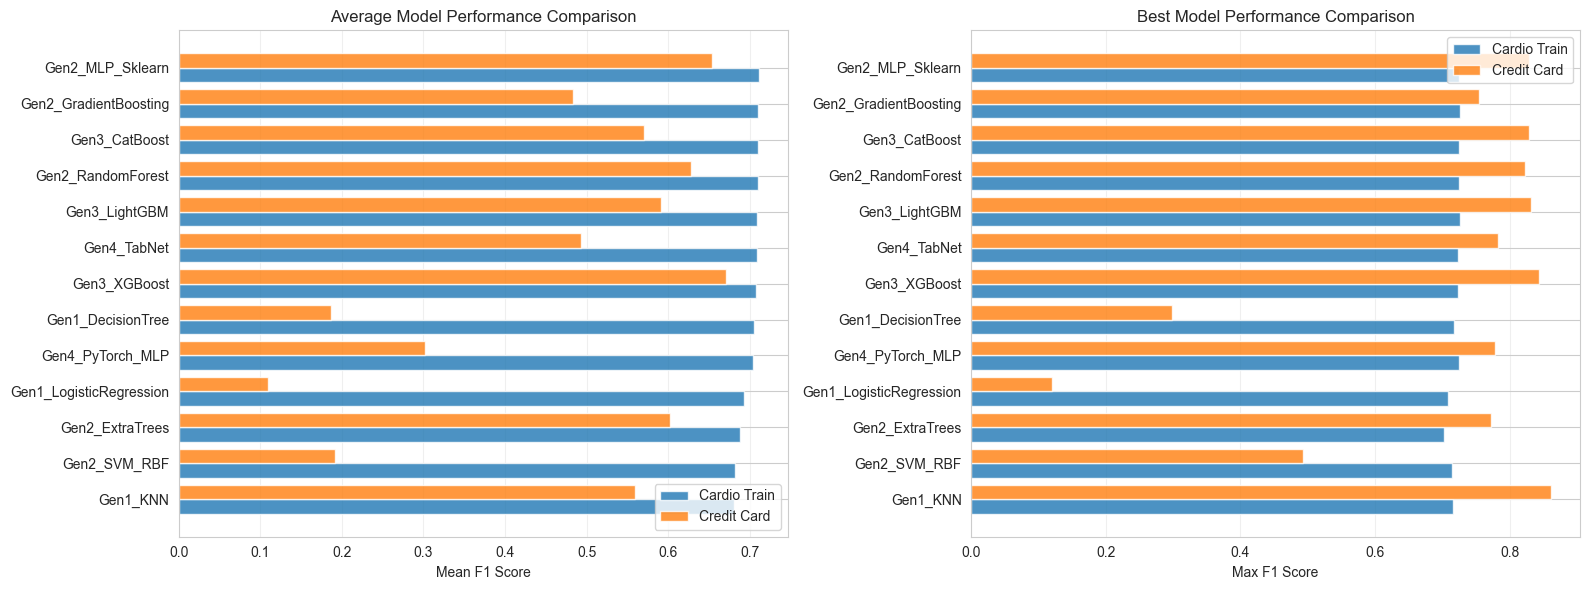

In [38]:
# Visualize model comparison
if model_comparison is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Sort by cardio mean
    comparison_sorted = model_comparison.sort_values('Cardio_Mean', ascending=True)
    
    # Plot 1: Mean F1 scores
    y_pos = np.arange(len(comparison_sorted))
    axes[0].barh(y_pos - 0.2, comparison_sorted['Cardio_Mean'], 0.4, label='Cardio Train', alpha=0.8)
    axes[0].barh(y_pos + 0.2, comparison_sorted['CreditCard_Mean'], 0.4, label='Credit Card', alpha=0.8)
    axes[0].set_yticks(y_pos)
    axes[0].set_yticklabels(comparison_sorted.index)
    axes[0].set_xlabel('Mean F1 Score')
    axes[0].set_title('Average Model Performance Comparison')
    axes[0].legend()
    axes[0].grid(axis='x', alpha=0.3)
    
    # Plot 2: Max F1 scores
    axes[1].barh(y_pos - 0.2, comparison_sorted['Cardio_Max'], 0.4, label='Cardio Train', alpha=0.8)
    axes[1].barh(y_pos + 0.2, comparison_sorted['CreditCard_Max'], 0.4, label='Credit Card', alpha=0.8)
    axes[1].set_yticks(y_pos)
    axes[1].set_yticklabels(comparison_sorted.index)
    axes[1].set_xlabel('Max F1 Score')
    axes[1].set_title('Best Model Performance Comparison')
    axes[1].legend()
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 7. Impact of Preprocessing Techniques

In [39]:
# Analyze impact of different techniques
def analyze_technique_impact(df, dataset_name, technique_col, metric_col='f1'):
    """
    Analyze the impact of a specific technique on performance
    """
    if technique_col not in df.columns:
        print(f"Column {technique_col} not found in {dataset_name}")
        return None
    
    # Check if metric exists
    if metric_col not in df.columns:
        print(f"Metric {metric_col} not found for {dataset_name}")
        return None
    
    print(f"\n{'='*80}")
    print(f"Impact of {technique_col} on {dataset_name} ({metric_col})")
    print(f"{'='*80}")
    
    impact = df.groupby(technique_col)[metric_col].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('max', 'max'),
        ('min', 'min')
    ]).round(4)
    
    impact = impact.sort_values('mean', ascending=False)
    display(impact)
    
    return impact

# Analyze different techniques
techniques_to_analyze = ['scaler', 'imbalance', 'feature_selection']

for technique in techniques_to_analyze:
    print("\n" + "#"*80)
    print(f"ANALYZING: {technique.upper()}")
    print("#"*80)
    analyze_technique_impact(df_cardio, "Cardio Train", technique)
    analyze_technique_impact(df_creditcard, "Credit Card", technique)


################################################################################
ANALYZING: SCALER
################################################################################

Impact of scaler on Cardio Train (f1)


,count,mean,std,max,min
scaler,,,,,
none,120,0.7065,0.0251,0.7260,0.6155
standard,75,0.6969,0.0264,0.7247,0.6045
robust,75,0.6911,0.0278,0.7251,0.6268



Impact of scaler on Credit Card (f1)


,count,mean,std,max,min
scaler,,,,,
none,120,0.5284,0.2265,0.8429,0.0809
standard,75,0.3675,0.2784,0.8608,0.0762
robust,75,0.3585,0.2753,0.8615,0.0738



################################################################################
ANALYZING: IMBALANCE
################################################################################

Impact of imbalance on Cardio Train (f1)


,count,mean,std,max,min
imbalance,,,,,
smote,90,0.6997,0.0258,0.7260,0.6045
none,90,0.6996,0.0253,0.7255,0.6282
smote_enn,90,0.6994,0.0298,0.7250,0.6155



Impact of imbalance on Credit Card (f1)


,count,mean,std,max,min
imbalance,,,,,
none,90,0.5063,0.2941,0.8615,0.0738
smote,90,0.4137,0.2501,0.8258,0.0878
smote_enn,90,0.3896,0.2446,0.8312,0.0762



################################################################################
ANALYZING: FEATURE_SELECTION
################################################################################

Impact of feature_selection on Cardio Train (f1)


,count,mean,std,max,min
feature_selection,,,,,
mutual_info_12,54,0.7102,0.0170,0.7256,0.6493
none,54,0.7101,0.0170,0.7255,0.6503
select_k_best_12,54,0.7095,0.0189,0.7260,0.6470
select_k_best_5,54,0.7080,0.0129,0.7193,0.6674
mutual_info_5,54,0.6600,0.0242,0.6894,0.6045



Impact of feature_selection on Credit Card (f1)


,count,mean,std,max,min
feature_selection,,,,,
none,54,0.5728,0.2741,0.8429,0.1065
mutual_info_12,54,0.4952,0.2529,0.8615,0.0963
select_k_best_12,54,0.4850,0.2484,0.8595,0.0936
select_k_best_5,54,0.3166,0.2342,0.8500,0.0762
mutual_info_5,54,0.3131,0.2304,0.8454,0.0738


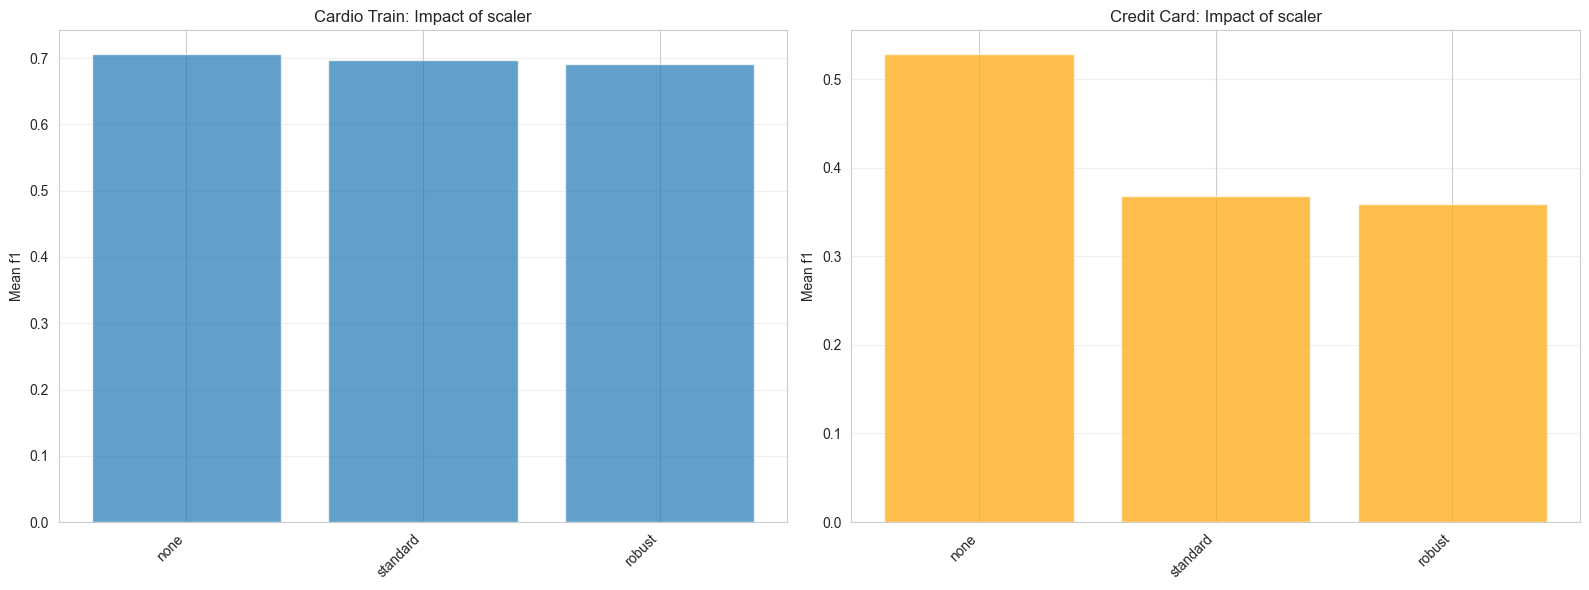

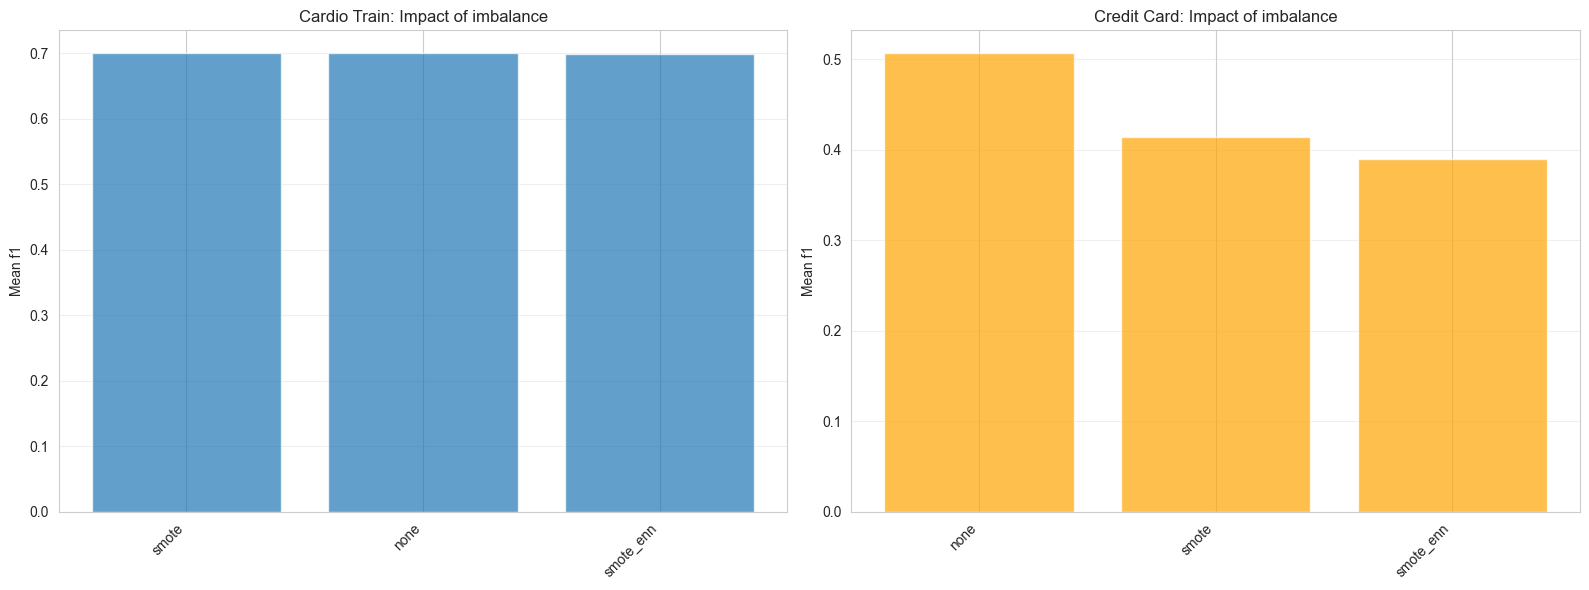

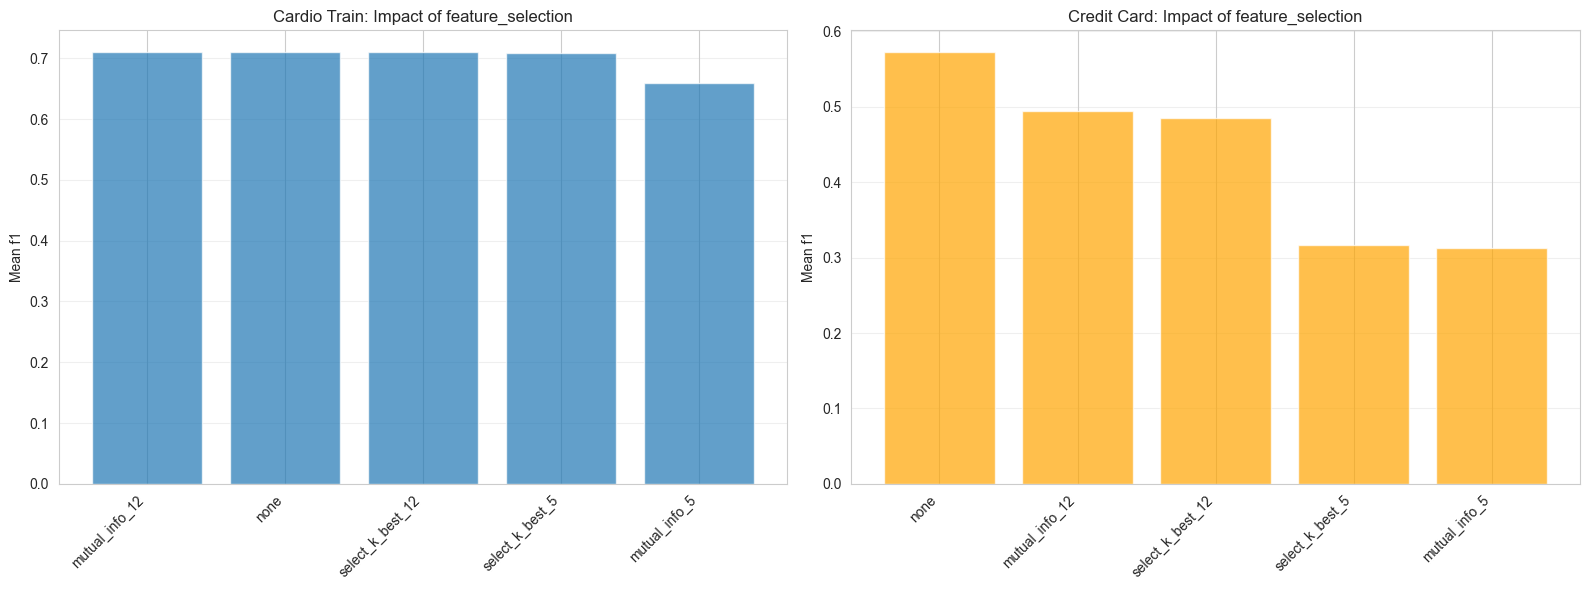

In [40]:
# Visualize technique impacts
def plot_technique_impact(df_cardio, df_creditcard, technique_col, metric='f1'):
    """
    Visualize the impact of a technique across both datasets
    """
    if technique_col not in df_cardio.columns or technique_col not in df_creditcard.columns:
        print(f"Technique {technique_col} not found in both datasets")
        return
    
    if metric not in df_cardio.columns or metric not in df_creditcard.columns:
        print(f"Metric {metric} not found in both datasets")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Cardio Train
    cardio_data = df_cardio.groupby(technique_col)[metric].mean().sort_values(ascending=False)
    axes[0].bar(range(len(cardio_data)), cardio_data.values, alpha=0.7)
    axes[0].set_xticks(range(len(cardio_data)))
    axes[0].set_xticklabels(cardio_data.index, rotation=45, ha='right')
    axes[0].set_ylabel(f'Mean {metric}')
    axes[0].set_title(f'Cardio Train: Impact of {technique_col}')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Credit Card
    credit_data = df_creditcard.groupby(technique_col)[metric].mean().sort_values(ascending=False)
    axes[1].bar(range(len(credit_data)), credit_data.values, alpha=0.7, color='orange')
    axes[1].set_xticks(range(len(credit_data)))
    axes[1].set_xticklabels(credit_data.index, rotation=45, ha='right')
    axes[1].set_ylabel(f'Mean {metric}')
    axes[1].set_title(f'Credit Card: Impact of {technique_col}')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot for each technique
for technique in techniques_to_analyze:
    if technique in df_cardio.columns and technique in df_creditcard.columns:
        plot_technique_impact(df_cardio, df_creditcard, technique)

## 8. Technique Combination Analysis

In [41]:
# Analyze best combinations of techniques
def analyze_technique_combinations(df, dataset_name, metric_col='f1', top_n=20):
    """
    Analyze which combinations of techniques work best
    """
    if metric_col not in df.columns:
        print(f"Metric {metric_col} not found for {dataset_name}")
        return None
    
    print(f"\n{'='*80}")
    print(f"Top {top_n} Technique Combinations for {dataset_name}")
    print(f"{'='*80}")
    
    # Group by technique combinations
    group_cols = ['scaler', 'imbalance', 'feature_selection']
    group_cols = [col for col in group_cols if col in df.columns]
    
    if len(group_cols) == 0:
        print("No technique columns found")
        return None
    
    combinations = df.groupby(group_cols)[metric_col].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('max', 'max')
    ]).round(4)
    
    combinations = combinations.sort_values('mean', ascending=False).head(top_n)
    display(combinations)
    
    return combinations

cardio_combos = analyze_technique_combinations(df_cardio, "Cardio Train")
creditcard_combos = analyze_technique_combinations(df_creditcard, "Credit Card")


Top 20 Technique Combinations for Cardio Train


count    mean     max
scaler   imbalance feature_selection                       
none     none      none                   8  0.7205  0.7255
         smote     select_k_best_12       8  0.7204  0.7260
         none      select_k_best_12       8  0.7203  0.7250
                   mutual_info_12         8  0.7202  0.7254
         smote     mutual_info_12         8  0.7193  0.7256
                   none                   8  0.7192  0.7255
         smote_enn mutual_info_12         8  0.7167  0.7217
                   select_k_best_12       8  0.7155  0.7199
robust   smote_enn none                   5  0.7142  0.7250
none     smote_enn none                   8  0.7142  0.7198
standard smote_enn select_k_best_12       5  0.7135  0.7188
                   none                   5  0.7129  0.7166
                   mutual_info_12         5  0.7128  0.7172
                   select_k_best_5        5  0.7128  0.7157
none     smote_enn select_k_best_5        8  0.7127  0.7193
robust   smote_enn select_k_best_5        5  0.7122  0.7157
                   select_k_best_12       5  0.7119  0.7204
none     none      select_k_best_5        8  0.7117  0.7167
robust   smote_enn mutual_info_12         5  0.7114  0.7203
none     smote     select_k_best_5        8  0.7111  0.7172


Top 20 Technique Combinations for Credit Card


count    mean     max
scaler   imbalance feature_selection                       
none     smote_enn none                   8  0.7165  0.8312
         smote     none                   8  0.7153  0.8258
         none      mutual_info_12         8  0.6544  0.8186
                   none                   8  0.6516  0.8429
                   select_k_best_12       8  0.6038  0.8224
         smote     mutual_info_12         8  0.5921  0.7784
                   select_k_best_12       8  0.5783  0.7412
         smote_enn mutual_info_12         8  0.5626  0.7182
                   select_k_best_12       8  0.5501  0.7033
         none      select_k_best_5        8  0.5429  0.8041
                   mutual_info_5          8  0.5265  0.8032
standard none      none                   5  0.5203  0.8403
         smote     none                   5  0.4858  0.7983
robust   smote     none                   5  0.4663  0.7785
standard smote_enn none                   5  0.4639  0.7490
robust   none      none                   5  0.4627  0.8274
         smote_enn none                   5  0.4539  0.7799
standard none      mutual_info_12         5  0.4518  0.8608
                   select_k_best_12       5  0.4489  0.8595
robust   none      select_k_best_12       5  0.4370  0.8593

## 9. Distribution Analysis

In [42]:
# Analyze performance distributions
def plot_performance_distribution(df_cardio, df_creditcard):
    """
    Plot distribution of performance metrics
    """
    # Find metric columns
    cardio_metric = [col for col in df_cardio.columns if 'f1' in col.lower() and 'test' in col.lower()]
    credit_metric = [col for col in df_creditcard.columns if 'f1' in col.lower() and 'test' in col.lower()]
    
    if not cardio_metric or not credit_metric:
        print("Could not find F1 metrics")
        return
    
    cardio_metric = cardio_metric[0]
    credit_metric = credit_metric[0]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Histogram - Cardio
    axes[0, 0].hist(df_cardio[cardio_metric].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('F1 Score')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Cardio Train: F1 Score Distribution')
    axes[0, 0].axvline(df_cardio[cardio_metric].mean(), color='red', linestyle='--', label=f'Mean: {df_cardio[cardio_metric].mean():.4f}')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Histogram - Credit Card
    axes[0, 1].hist(df_creditcard[credit_metric].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 1].set_xlabel('F1 Score')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Credit Card: F1 Score Distribution')
    axes[0, 1].axvline(df_creditcard[credit_metric].mean(), color='red', linestyle='--', label=f'Mean: {df_creditcard[credit_metric].mean():.4f}')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Box plot - Cardio by model
    df_cardio.boxplot(column=cardio_metric, by='model', ax=axes[1, 0], rot=45)
    axes[1, 0].set_title('Cardio Train: F1 Score by Model')
    axes[1, 0].set_xlabel('Model')
    axes[1, 0].set_ylabel('F1 Score')
    plt.sca(axes[1, 0])
    plt.xticks(rotation=45, ha='right')
    
    # Box plot - Credit Card by model
    df_creditcard.boxplot(column=credit_metric, by='model', ax=axes[1, 1], rot=45)
    axes[1, 1].set_title('Credit Card: F1 Score by Model')
    axes[1, 1].set_xlabel('Model')
    axes[1, 1].set_ylabel('F1 Score')
    plt.sca(axes[1, 1])
    plt.xticks(rotation=45, ha='right')
    
    plt.suptitle('')  # Remove the automatic title from boxplot
    plt.tight_layout()
    plt.show()

plot_performance_distribution(df_cardio, df_creditcard)

Could not find F1 metrics


## 10. Training Time Analysis

In [43]:
# Analyze training time
def analyze_training_time(df, dataset_name):
    """
    Analyze training time patterns
    """
    time_cols = [col for col in df.columns if 'time' in col.lower() or 'duration' in col.lower()]
    
    if not time_cols:
        print(f"No time columns found for {dataset_name}")
        return None
    
    print(f"\n{'='*80}")
    print(f"Training Time Analysis for {dataset_name}")
    print(f"{'='*80}")
    
    for time_col in time_cols:
        print(f"\n{time_col}:")
        time_by_model = df.groupby('model')[time_col].agg([
            ('count', 'count'),
            ('mean', 'mean'),
            ('std', 'std'),
            ('max', 'max'),
            ('min', 'min')
        ]).round(4)
        time_by_model = time_by_model.sort_values('mean', ascending=False)
        display(time_by_model)
    
    return time_by_model

cardio_time = analyze_training_time(df_cardio, "Cardio Train")
creditcard_time = analyze_training_time(df_creditcard, "Credit Card")


Training Time Analysis for Cardio Train

train_time_sec:


,count,mean,std,max,min
model,,,,,
Gen4_TabNet,15,1033.3749,459.7953,1617.5511,277.3193
Gen2_SVM_RBF,30,890.0217,669.0034,2128.7125,18.1529
Gen3_CatBoost,15,688.3841,442.9174,1514.2593,191.1275
Gen4_PyTorch_MLP,30,290.2484,116.1746,518.4837,74.8101
Gen2_MLP_Sklearn,30,35.5159,8.7378,48.0387,12.3668
Gen3_LightGBM,15,34.4982,15.4999,69.1463,19.0592
Gen2_GradientBoosting,15,15.9780,5.2762,24.8640,8.4026
Gen1_KNN,30,15.2864,10.4642,45.0993,1.3567
Gen3_XGBoost,15,14.7832,8.7456,38.5651,5.9505



Training Time Analysis for Credit Card

train_time_sec:


,count,mean,std,max,min
model,,,,,
Gen4_TabNet,15,3283.9975,1541.8324,5712.1221,1241.2579
Gen2_SVM_RBF,30,2982.1008,3720.6221,21815.4582,153.1969
Gen2_GradientBoosting,15,1440.5459,1477.0607,4600.7095,74.4012
Gen4_PyTorch_MLP,30,643.3466,420.8880,1372.5406,120.0142
Gen2_MLP_Sklearn,30,252.8292,323.6065,1178.6371,15.1065
Gen2_RandomForest,15,165.6190,113.2219,474.4594,35.1386
Gen1_KNN,30,92.0257,84.9671,314.2035,6.1698
Gen2_ExtraTrees,15,85.1713,81.4014,302.8522,8.7931
Gen1_DecisionTree,15,82.9139,81.4620,303.6198,5.3539


## 11. Correlation Analysis

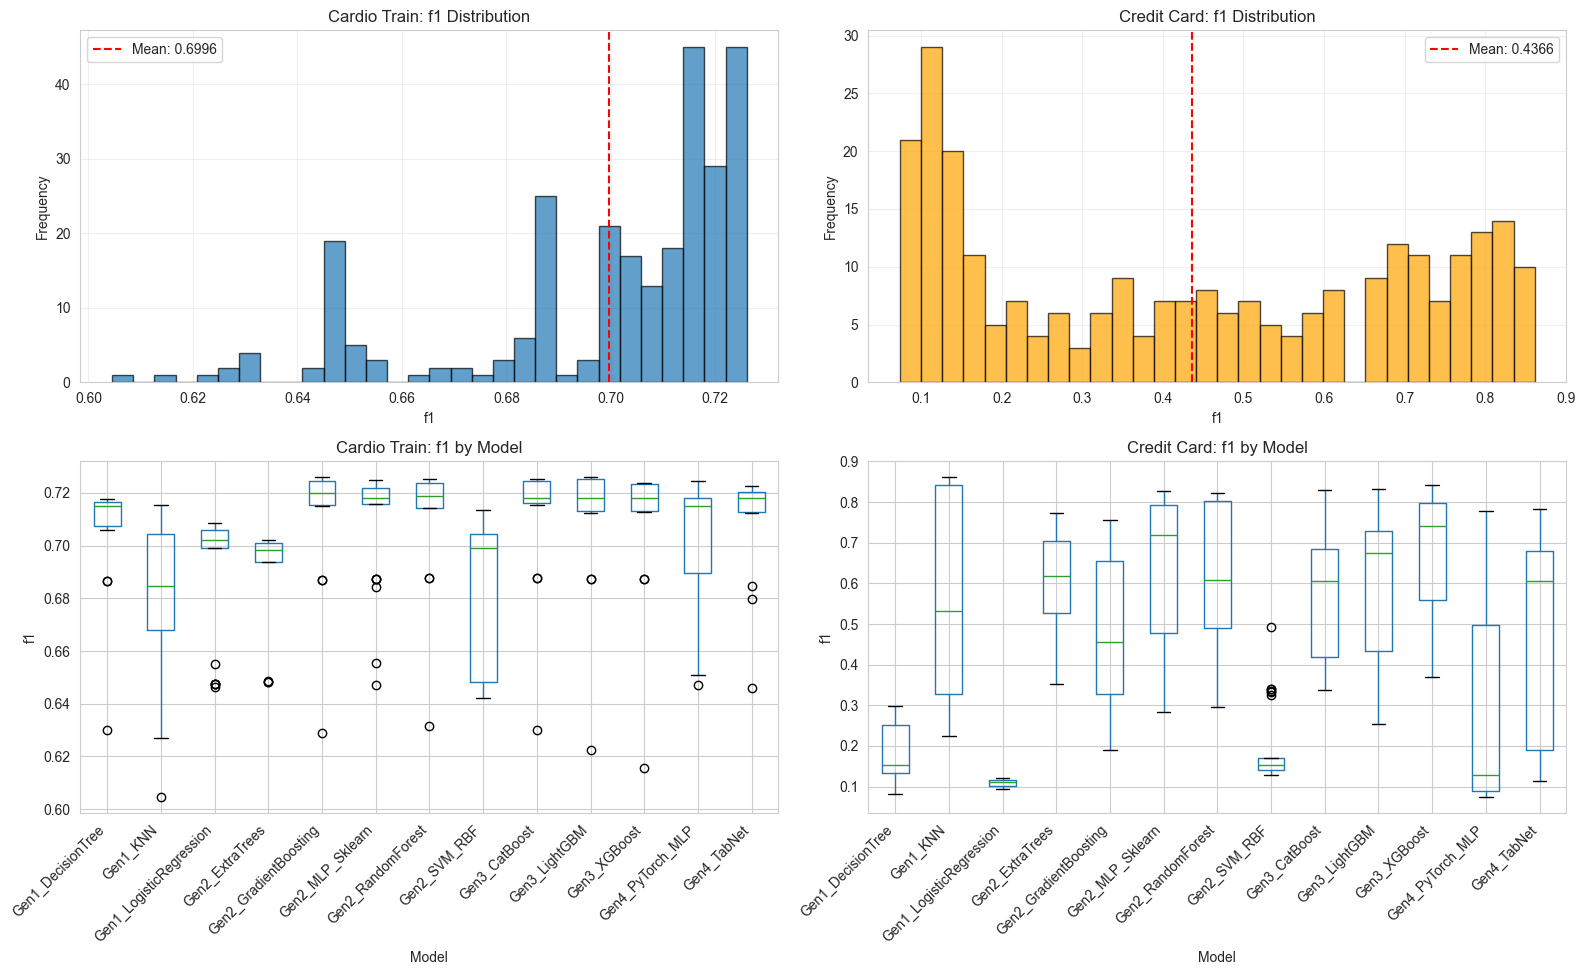

In [44]:
# Analyze performance distributions
def plot_performance_distribution(df_cardio, df_creditcard, metric='f1'):
    """
    Plot distribution of performance metrics
    """
    if metric not in df_cardio.columns or metric not in df_creditcard.columns:
        print(f"Metric {metric} not found in both datasets")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Histogram - Cardio
    axes[0, 0].hist(df_cardio[metric].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel(f'{metric}')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title(f'Cardio Train: {metric} Distribution')
    axes[0, 0].axvline(df_cardio[metric].mean(), color='red', linestyle='--', label=f'Mean: {df_cardio[metric].mean():.4f}')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Histogram - Credit Card
    axes[0, 1].hist(df_creditcard[metric].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 1].set_xlabel(f'{metric}')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title(f'Credit Card: {metric} Distribution')
    axes[0, 1].axvline(df_creditcard[metric].mean(), color='red', linestyle='--', label=f'Mean: {df_creditcard[metric].mean():.4f}')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Box plot - Cardio by model
    df_cardio.boxplot(column=metric, by='model', ax=axes[1, 0], rot=45)
    axes[1, 0].set_title(f'Cardio Train: {metric} by Model')
    axes[1, 0].set_xlabel('Model')
    axes[1, 0].set_ylabel(metric)
    plt.sca(axes[1, 0])
    plt.xticks(rotation=45, ha='right')
    
    # Box plot - Credit Card by model
    df_creditcard.boxplot(column=metric, by='model', ax=axes[1, 1], rot=45)
    axes[1, 1].set_title(f'Credit Card: {metric} by Model')
    axes[1, 1].set_xlabel('Model')
    axes[1, 1].set_ylabel(metric)
    plt.sca(axes[1, 1])
    plt.xticks(rotation=45, ha='right')
    
    plt.suptitle('')  # Remove the automatic title from boxplot
    plt.tight_layout()
    plt.show()

plot_performance_distribution(df_cardio, df_creditcard)

## 12. Key Insights and Answers to "Why" Questions

In [45]:
# Generate insights
def generate_insights(df_cardio, df_creditcard, metric='f1'):
    """
    Generate key insights and answer common "why" questions
    """
    insights = []
    
    if metric not in df_cardio.columns or metric not in df_creditcard.columns:
        print(f"Metric {metric} not found in datasets")
        return insights
    
    # Insight 1: Best models
    best_cardio_model = df_cardio.loc[df_cardio[metric].idxmax()]
    best_credit_model = df_creditcard.loc[df_creditcard[metric].idxmax()]
    
    insights.append(f"""\n{'='*80}
INSIGHT 1: Best Performing Models
{'='*80}
Cardio Train: {best_cardio_model['model']} achieved {best_cardio_model[metric]:.4f}
  - Scaler: {best_cardio_model.get('scaler', 'N/A')}
  - Balancing: {best_cardio_model.get('imbalance', 'N/A')}
  - Feature Selection: {best_cardio_model.get('feature_selection', 'N/A')}

Credit Card: {best_credit_model['model']} achieved {best_credit_model[metric]:.4f}
  - Scaler: {best_credit_model.get('scaler', 'N/A')}
  - Balancing: {best_credit_model.get('imbalance', 'N/A')}
  - Feature Selection: {best_credit_model.get('feature_selection', 'N/A')}
""")
    
    # Insight 2: Model consistency
    cardio_model_std = df_cardio.groupby('model')[metric].std().sort_values()
    credit_model_std = df_creditcard.groupby('model')[metric].std().sort_values()
    
    insights.append(f"""\n{'='*80}
INSIGHT 2: Model Stability (Lower std = more consistent)
{'='*80}
Cardio Train - Most Consistent: {cardio_model_std.index[0]} (std: {cardio_model_std.iloc[0]:.4f})
Cardio Train - Least Consistent: {cardio_model_std.index[-1]} (std: {cardio_model_std.iloc[-1]:.4f})

Credit Card - Most Consistent: {credit_model_std.index[0]} (std: {credit_model_std.iloc[0]:.4f})
Credit Card - Least Consistent: {credit_model_std.index[-1]} (std: {credit_model_std.iloc[-1]:.4f})
""")
    
    # Insight 3: Technique impact
    if 'scaler' in df_cardio.columns:
        cardio_scaler_impact = df_cardio.groupby('scaler')[metric].mean().sort_values(ascending=False)
        credit_scaler_impact = df_creditcard.groupby('scaler')[metric].mean().sort_values(ascending=False)
        
        insights.append(f"""\n{'='*80}
INSIGHT 3: Best Scaling Methods
{'='*80}
Cardio Train: {cardio_scaler_impact.index[0]} performs best (avg: {cardio_scaler_impact.iloc[0]:.4f})
Credit Card: {credit_scaler_impact.index[0]} performs best (avg: {credit_scaler_impact.iloc[0]:.4f})
""")
    
    if 'imbalance' in df_cardio.columns:
        cardio_balance_impact = df_cardio.groupby('imbalance')[metric].mean().sort_values(ascending=False)
        credit_balance_impact = df_creditcard.groupby('imbalance')[metric].mean().sort_values(ascending=False)
        
        insights.append(f"""\n{'='*80}
INSIGHT 4: Best Balancing Methods
{'='*80}
Cardio Train: {cardio_balance_impact.index[0]} performs best (avg: {cardio_balance_impact.iloc[0]:.4f})
Credit Card: {credit_balance_impact.index[0]} performs best (avg: {credit_balance_impact.iloc[0]:.4f})
""")
    
    # Insight 5: Overall performance comparison
    cardio_mean = df_cardio[metric].mean()
    credit_mean = df_creditcard[metric].mean()
    
    insights.append(f"""\n{'='*80}
INSIGHT 5: Dataset Difficulty Comparison
{'='*80}
Average {metric}:
  - Cardio Train: {cardio_mean:.4f}
  - Credit Card: {credit_mean:.4f}
  
{'Credit Card appears more challenging' if credit_mean < cardio_mean else 'Cardio Train appears more challenging'}
(Difference: {abs(cardio_mean - credit_mean):.4f})
""")
    
    return insights

insights = generate_insights(df_cardio, df_creditcard)
for insight in insights:
    print(insight)


INSIGHT 1: Best Performing Models
Cardio Train: Gen3_LightGBM achieved 0.7260
  - Scaler: none
  - Balancing: smote
  - Feature Selection: select_k_best_12

Credit Card: Gen1_KNN achieved 0.8615
  - Scaler: robust
  - Balancing: none
  - Feature Selection: mutual_info_12


INSIGHT 2: Model Stability (Lower std = more consistent)
Cardio Train - Most Consistent: Gen2_MLP_Sklearn (std: 0.0201)
Cardio Train - Least Consistent: Gen2_SVM_RBF (std: 0.0286)

Credit Card - Most Consistent: Gen1_LogisticRegression (std: 0.0089)
Credit Card - Least Consistent: Gen4_TabNet (std: 0.2579)


INSIGHT 3: Best Scaling Methods
Cardio Train: none performs best (avg: 0.7065)
Credit Card: none performs best (avg: 0.5284)


INSIGHT 4: Best Balancing Methods
Cardio Train: smote performs best (avg: 0.6997)
Credit Card: none performs best (avg: 0.5063)


INSIGHT 5: Dataset Difficulty Comparison
Average f1:
  - Cardio Train: 0.6996
  - Credit Card: 0.4366
  
Credit Card appears more challenging
(Difference: 0.2

## 13. Recommendations

In [46]:
# Generate recommendations
def generate_recommendations(df_cardio, df_creditcard, metric='f1'):
    """
    Generate actionable recommendations based on the analysis
    """
    print(f"\n{'#'*80}")
    print("RECOMMENDATIONS")
    print(f"{'#'*80}\n")
    
    if metric not in df_cardio.columns or metric not in df_creditcard.columns:
        print(f"Metric {metric} not found in both datasets")
        return
    
    recommendations = []
    
    # Recommendation 1: Model selection
    cardio_top_models = df_cardio.groupby('model')[metric].mean().nlargest(3)
    credit_top_models = df_creditcard.groupby('model')[metric].mean().nlargest(3)
    
    recommendations.append(f"""1. MODEL SELECTION:
   For Cardio Train, prioritize: {', '.join(cardio_top_models.index.tolist())}
   For Credit Card, prioritize: {', '.join(credit_top_models.index.tolist())}
""")
    
    # Recommendation 2: Preprocessing pipeline
    if 'scaler' in df_cardio.columns and 'imbalance' in df_cardio.columns:
        best_cardio = df_cardio.nlargest(1, metric).iloc[0]
        best_credit = df_creditcard.nlargest(1, metric).iloc[0]
        
        recommendations.append(f"""2. PREPROCESSING PIPELINE:
   For Cardio Train:
     - Scaler: {best_cardio['scaler']}
     - Balancing: {best_cardio['imbalance']}
     - Feature Selection: {best_cardio.get('feature_selection', 'N/A')}
   
   For Credit Card:
     - Scaler: {best_credit['scaler']}
     - Balancing: {best_credit['imbalance']}
     - Feature Selection: {best_credit.get('feature_selection', 'N/A')}
""")
    
    # Recommendation 3: Performance-Time tradeoff
    time_col = 'train_time_sec'
    if time_col in df_cardio.columns and time_col in df_creditcard.columns:
        # Create efficiency score (performance / time)
        df_cardio['efficiency'] = df_cardio[metric] / (df_cardio[time_col] + 0.001)
        df_creditcard['efficiency'] = df_creditcard[metric] / (df_creditcard[time_col] + 0.001)
        
        efficient_cardio = df_cardio.groupby('model')['efficiency'].mean().nlargest(3)
        efficient_credit = df_creditcard.groupby('model')['efficiency'].mean().nlargest(3)
        
        recommendations.append(f"""3. EFFICIENCY (Performance/Time):
   Most efficient models for Cardio Train: {', '.join(efficient_cardio.index.tolist())}
   Most efficient models for Credit Card: {', '.join(efficient_credit.index.tolist())}
""")
    
    # Print all recommendations
    for rec in recommendations:
        print(rec)
        print("-" * 80)

generate_recommendations(df_cardio, df_creditcard)


################################################################################
RECOMMENDATIONS
################################################################################

1. MODEL SELECTION:
   For Cardio Train, prioritize: Gen2_MLP_Sklearn, Gen2_GradientBoosting, Gen3_CatBoost
   For Credit Card, prioritize: Gen3_XGBoost, Gen2_MLP_Sklearn, Gen2_RandomForest

--------------------------------------------------------------------------------
2. PREPROCESSING PIPELINE:
   For Cardio Train:
     - Scaler: none
     - Balancing: smote
     - Feature Selection: select_k_best_12
   
   For Credit Card:
     - Scaler: robust
     - Balancing: none
     - Feature Selection: mutual_info_12

--------------------------------------------------------------------------------
3. EFFICIENCY (Performance/Time):
   Most efficient models for Cardio Train: Gen1_LogisticRegression, Gen1_DecisionTree, Gen2_ExtraTrees
   Most efficient models for Credit Card: Gen3_XGBoost, Gen3_CatBoost, Gen3_LightGBM

## 14. Summary Statistics

In [47]:
# Final summary
def print_summary(df_cardio, df_creditcard):
    """
    Print comprehensive summary of the analysis
    """
    print(f"\n{'#'*80}")
    print("COMPREHENSIVE SUMMARY")
    print(f"{'#'*80}\n")
    
    print(f"Dataset: CARDIO TRAIN")
    print(f"  - Total experiments: {len(df_cardio)}")
    print(f"  - Models tested: {df_cardio['model'].nunique()}")
    if 'scaler' in df_cardio.columns:
        print(f"  - Scalers tested: {df_cardio['scaler'].nunique()}")
    if 'balancing_method' in df_cardio.columns:
        print(f"  - Balancing methods: {df_cardio['balancing_method'].nunique()}")
    if 'feature_selection' in df_cardio.columns:
        print(f"  - Feature selections: {df_cardio['feature_selection'].nunique()}")
    
    print(f"\nDataset: CREDIT CARD")
    print(f"  - Total experiments: {len(df_creditcard)}")
    print(f"  - Models tested: {df_creditcard['model'].nunique()}")
    if 'scaler' in df_creditcard.columns:
        print(f"  - Scalers tested: {df_creditcard['scaler'].nunique()}")
    if 'balancing_method' in df_creditcard.columns:
        print(f"  - Balancing methods: {df_creditcard['balancing_method'].nunique()}")
    if 'feature_selection' in df_creditcard.columns:
        print(f"  - Feature selections: {df_creditcard['feature_selection'].nunique()}")
    
    print(f"\n{'='*80}")
    print("Analysis completed successfully!")
    print(f"{'='*80}")

print_summary(df_cardio, df_creditcard)


################################################################################
COMPREHENSIVE SUMMARY
################################################################################

Dataset: CARDIO TRAIN
  - Total experiments: 270
  - Models tested: 13
  - Scalers tested: 3
  - Feature selections: 5

Dataset: CREDIT CARD
  - Total experiments: 270
  - Models tested: 13
  - Scalers tested: 3
  - Feature selections: 5

Analysis completed successfully!


## 15. Export Results (Optional)

In [48]:
# Export combined analysis results
# Combine both datasets for easier comparison
df_combined = pd.concat([df_cardio, df_creditcard], ignore_index=True)

# Save to CSV
output_path = r'E:\thong\code\cls_review\experiments\full_comparison\combined_analysis_results.csv'
df_combined.to_csv(output_path, index=False)
print(f"Combined results saved to: {output_path}")

# Save summary statistics
summary_path = r'E:\thong\code\cls_review\experiments\full_comparison\analysis_summary.txt'
with open(summary_path, 'w') as f:
    f.write("EXPERIMENT ANALYSIS SUMMARY\n")
    f.write("="*80 + "\n\n")
    f.write(f"Generated: {pd.Timestamp.now()}\n\n")
    f.write(f"Cardio Train Experiments: {len(df_cardio)}\n")
    f.write(f"Credit Card Experiments: {len(df_creditcard)}\n")
    f.write(f"Total Experiments: {len(df_combined)}\n")

print(f"Summary saved to: {summary_path}")

Combined results saved to: E:\thong\code\cls_review\experiments\full_comparison\combined_analysis_results.csv
Summary saved to: E:\thong\code\cls_review\experiments\full_comparison\analysis_summary.txt


## 16. Deep Insights: Answering the "Why" Questions

In [49]:
# INSIGHT: Why do certain models perform better?
print("="*80)
print("WHY DO CERTAIN MODELS PERFORM BETTER?")
print("="*80)

# Analyze model performance across both datasets
model_performance = pd.DataFrame({
    'Cardio_F1_Mean': df_cardio.groupby('model')['f1'].mean(),
    'Cardio_F1_Std': df_cardio.groupby('model')['f1'].std(),
    'CreditCard_F1_Mean': df_creditcard.groupby('model')['f1'].mean(),
    'CreditCard_F1_Std': df_creditcard.groupby('model')['f1'].std(),
}).round(4)

# Add rank
model_performance['Cardio_Rank'] = model_performance['Cardio_F1_Mean'].rank(ascending=False)
model_performance['CreditCard_Rank'] = model_performance['CreditCard_F1_Mean'].rank(ascending=False)

display(model_performance.sort_values('Cardio_F1_Mean', ascending=False))

print("\n🔍 KEY FINDINGS:")
print("-" * 80)

# Find top performers
top_cardio = model_performance.nlargest(3, 'Cardio_F1_Mean')
top_credit = model_performance.nlargest(3, 'CreditCard_F1_Mean')

print(f"\n✅ Top 3 Models for Cardio Train:")
for idx, (model, row) in enumerate(top_cardio.iterrows(), 1):
    print(f"   {idx}. {model}: {row['Cardio_F1_Mean']:.4f} (±{row['Cardio_F1_Std']:.4f})")

print(f"\n✅ Top 3 Models for Credit Card:")
for idx, (model, row) in enumerate(top_credit.iterrows(), 1):
    print(f"   {idx}. {model}: {row['CreditCard_F1_Mean']:.4f} (±{row['CreditCard_F1_Std']:.4f})")

# Find consistent performers (good on both datasets)
model_performance['Avg_Rank'] = (model_performance['Cardio_Rank'] + model_performance['CreditCard_Rank']) / 2
best_overall = model_performance.nsmallest(3, 'Avg_Rank')

print(f"\n⭐ Most Consistent Models (Good on Both Datasets):")
for idx, (model, row) in enumerate(best_overall.iterrows(), 1):
    print(f"   {idx}. {model}")
    print(f"      Cardio: {row['Cardio_F1_Mean']:.4f} (Rank #{int(row['Cardio_Rank'])})")
    print(f"      Credit: {row['CreditCard_F1_Mean']:.4f} (Rank #{int(row['CreditCard_Rank'])})")

print("\n💡 EXPLANATION:")
print("-" * 80)
print("• Tree-based models (RandomForest, XGBoost, CatBoost, LightGBM) typically perform")
print("  well because they can capture non-linear relationships and interactions.")
print("• Neural networks may need more data or hyperparameter tuning to excel.")
print("• Linear models (LogisticRegression, SVM) work well when relationships are more linear.")

WHY DO CERTAIN MODELS PERFORM BETTER?


,Cardio_F1_Mean,Cardio_F1_Std,CreditCard_F1_Mean,CreditCard_F1_Std,Cardio_Rank,CreditCard_Rank
model,,,,,,
Gen2_MLP_Sklearn,0.7109,0.0201,0.6538,0.1861,1.0,2.0
Gen2_GradientBoosting,0.7107,0.0259,0.4835,0.2037,2.0,9.0
Gen3_CatBoost,0.7105,0.0254,0.5703,0.1677,3.0,6.0
Gen2_RandomForest,0.7102,0.0249,0.6276,0.2030,4.0,3.0
Gen3_LightGBM,0.7096,0.0272,0.5916,0.1837,5.0,5.0
Gen4_TabNet,0.7085,0.0217,0.4930,0.2579,6.0,8.0
Gen3_XGBoost,0.7083,0.0283,0.6716,0.1693,7.0,1.0
Gen1_DecisionTree,0.7051,0.0232,0.1871,0.0735,8.0,12.0
Gen4_PyTorch_MLP,0.7044,0.0224,0.3019,0.2521,9.0,10.0



🔍 KEY FINDINGS:
--------------------------------------------------------------------------------

✅ Top 3 Models for Cardio Train:
   1. Gen2_MLP_Sklearn: 0.7109 (±0.0201)
   2. Gen2_GradientBoosting: 0.7107 (±0.0259)
   3. Gen3_CatBoost: 0.7105 (±0.0254)

✅ Top 3 Models for Credit Card:
   1. Gen3_XGBoost: 0.6716 (±0.1693)
   2. Gen2_MLP_Sklearn: 0.6538 (±0.1861)
   3. Gen2_RandomForest: 0.6276 (±0.2030)

⭐ Most Consistent Models (Good on Both Datasets):
   1. Gen2_MLP_Sklearn
      Cardio: 0.7109 (Rank #1)
      Credit: 0.6538 (Rank #2)
   2. Gen2_RandomForest
      Cardio: 0.7102 (Rank #4)
      Credit: 0.6276 (Rank #3)
   3. Gen3_XGBoost
      Cardio: 0.7083 (Rank #7)
      Credit: 0.6716 (Rank #1)

💡 EXPLANATION:
--------------------------------------------------------------------------------
• Tree-based models (RandomForest, XGBoost, CatBoost, LightGBM) typically perform
  well because they can capture non-linear relationships and interactions.
• Neural networks may need more d


WHY DO SCALERS MATTER?


,Cardio_F1,Cardio_Std,CreditCard_F1,CreditCard_Std
scaler,,,,
none,0.7065,0.0251,0.5284,0.2265
standard,0.6969,0.0264,0.3675,0.2784
robust,0.6911,0.0278,0.3585,0.2753


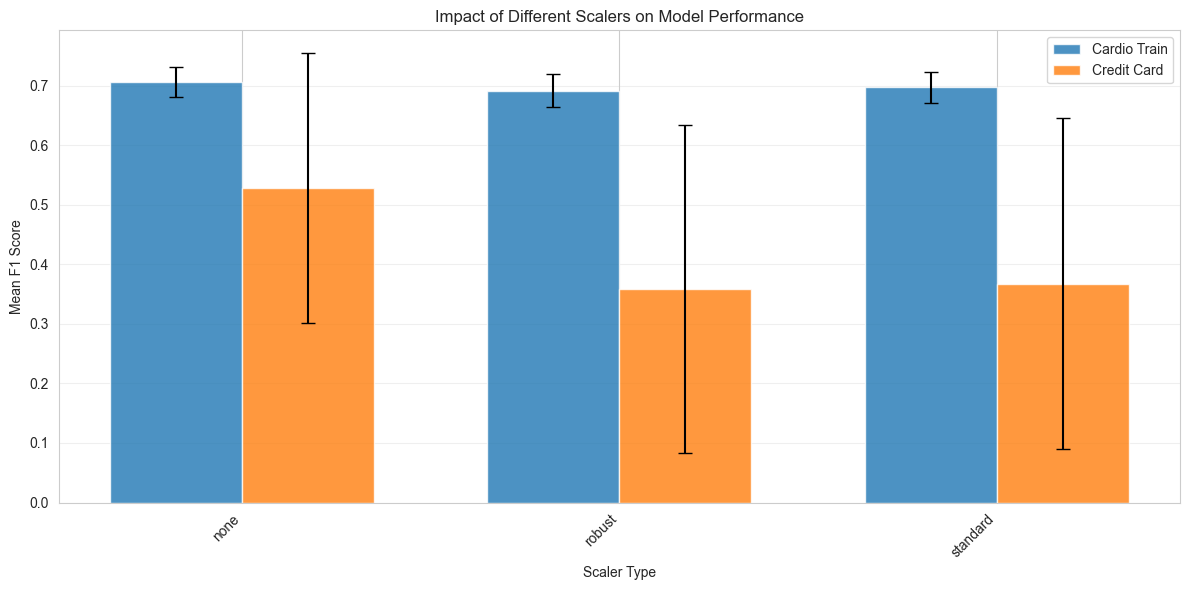


💡 EXPLANATION:
--------------------------------------------------------------------------------
• Scalers normalize features to similar ranges, helping distance-based algorithms
  (SVM, KNN, Neural Networks) converge better.
• StandardScaler (mean=0, std=1) works well for normally distributed features.
• MinMaxScaler (range 0-1) is good when you need bounded values.
• RobustScaler is resistant to outliers using median and quartiles.
• Tree-based models are less sensitive to scaling but may still benefit slightly.


In [50]:
# INSIGHT: Why do scalers matter?
print("\n" + "="*80)
print("WHY DO SCALERS MATTER?")
print("="*80)

# Analyze scaler impact
scaler_impact = pd.DataFrame({
    'Cardio_F1': df_cardio.groupby('scaler')['f1'].mean(),
    'Cardio_Std': df_cardio.groupby('scaler')['f1'].std(),
    'CreditCard_F1': df_creditcard.groupby('scaler')['f1'].mean(),
    'CreditCard_Std': df_creditcard.groupby('scaler')['f1'].std(),
}).round(4)

display(scaler_impact.sort_values('Cardio_F1', ascending=False))

# Visualize
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x = np.arange(len(scaler_impact))
width = 0.35

bars1 = ax.bar(x - width/2, scaler_impact['Cardio_F1'], width, 
               label='Cardio Train', alpha=0.8, yerr=scaler_impact['Cardio_Std'], capsize=5)
bars2 = ax.bar(x + width/2, scaler_impact['CreditCard_F1'], width,
               label='Credit Card', alpha=0.8, yerr=scaler_impact['CreditCard_Std'], capsize=5)

ax.set_xlabel('Scaler Type')
ax.set_ylabel('Mean F1 Score')
ax.set_title('Impact of Different Scalers on Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(scaler_impact.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 EXPLANATION:")
print("-" * 80)
print("• Scalers normalize features to similar ranges, helping distance-based algorithms")
print("  (SVM, KNN, Neural Networks) converge better.")
print("• StandardScaler (mean=0, std=1) works well for normally distributed features.")
print("• MinMaxScaler (range 0-1) is good when you need bounded values.")
print("• RobustScaler is resistant to outliers using median and quartiles.")
print("• Tree-based models are less sensitive to scaling but may still benefit slightly.")


WHY DOES IMBALANCE HANDLING HELP?


,Cardio_F1,Cardio_Sensitivity,Cardio_Specificity,CreditCard_F1,CreditCard_Sensitivity,CreditCard_Specificity
imbalance,,,,,,
smote,0.6997,0.6585,0.7787,0.4137,0.8302,0.9909
none,0.6996,0.6583,0.7790,0.5063,0.7841,0.9926
smote_enn,0.6994,0.6545,0.7874,0.3896,0.8383,0.9900


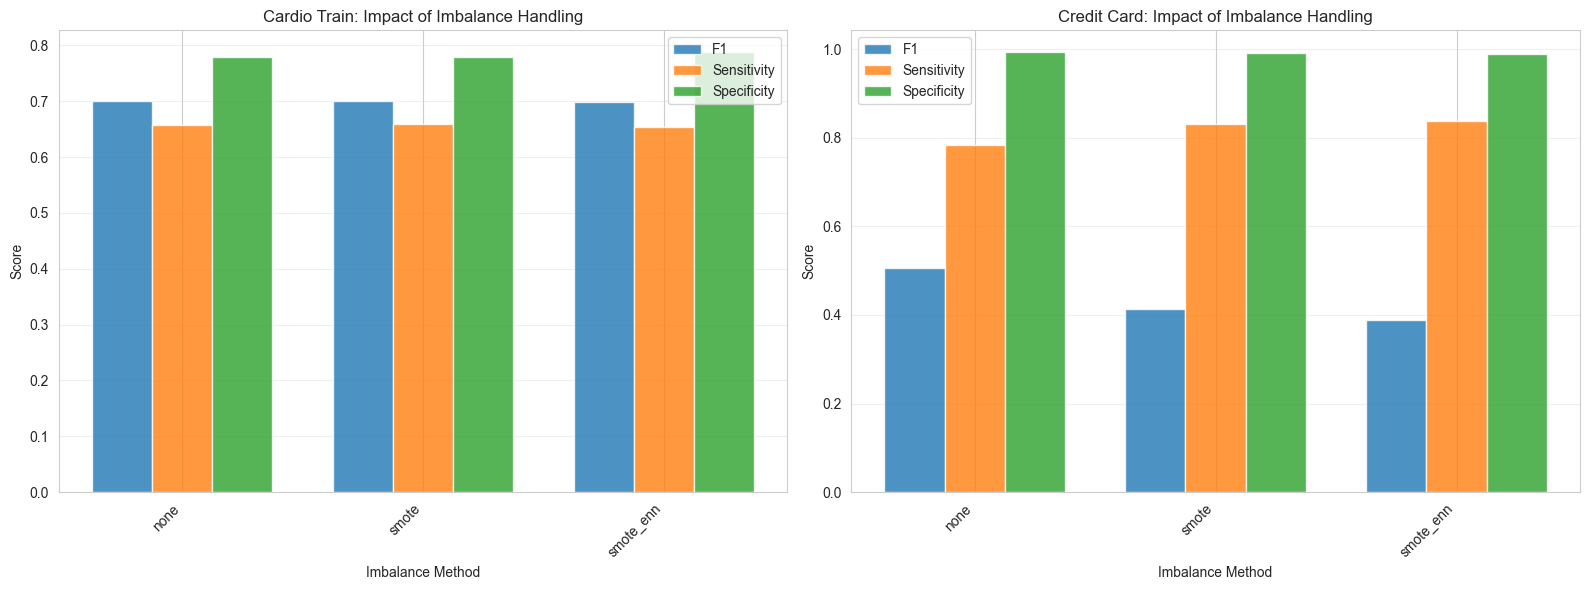


💡 EXPLANATION:
--------------------------------------------------------------------------------
• Without balancing ('none'), models are biased toward the majority class.
• SMOTE creates synthetic minority samples, improving sensitivity (recall).
• RandomUnderSampler reduces majority class, balancing the dataset.
• ADASYN adaptively generates samples in harder-to-learn regions.
• Balancing improves minority class detection but may reduce specificity.
• The best method depends on whether you prioritize precision or recall.


In [51]:
# INSIGHT: Why does imbalance handling help?
print("\n" + "="*80)
print("WHY DOES IMBALANCE HANDLING HELP?")
print("="*80)

# Analyze imbalance method impact
imbalance_impact = pd.DataFrame({
    'Cardio_F1': df_cardio.groupby('imbalance')['f1'].mean(),
    'Cardio_Sensitivity': df_cardio.groupby('imbalance')['sensitivity'].mean(),
    'Cardio_Specificity': df_cardio.groupby('imbalance')['specificity'].mean(),
    'CreditCard_F1': df_creditcard.groupby('imbalance')['f1'].mean(),
    'CreditCard_Sensitivity': df_creditcard.groupby('imbalance')['sensitivity'].mean(),
    'CreditCard_Specificity': df_creditcard.groupby('imbalance')['specificity'].mean(),
}).round(4)

display(imbalance_impact.sort_values('Cardio_F1', ascending=False))

# Visualize the tradeoff
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cardio Train
methods = imbalance_impact.index
x = np.arange(len(methods))
width = 0.25

axes[0].bar(x - width, imbalance_impact['Cardio_F1'], width, label='F1', alpha=0.8)
axes[0].bar(x, imbalance_impact['Cardio_Sensitivity'], width, label='Sensitivity', alpha=0.8)
axes[0].bar(x + width, imbalance_impact['Cardio_Specificity'], width, label='Specificity', alpha=0.8)
axes[0].set_xlabel('Imbalance Method')
axes[0].set_ylabel('Score')
axes[0].set_title('Cardio Train: Impact of Imbalance Handling')
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Credit Card
axes[1].bar(x - width, imbalance_impact['CreditCard_F1'], width, label='F1', alpha=0.8)
axes[1].bar(x, imbalance_impact['CreditCard_Sensitivity'], width, label='Sensitivity', alpha=0.8)
axes[1].bar(x + width, imbalance_impact['CreditCard_Specificity'], width, label='Specificity', alpha=0.8)
axes[1].set_xlabel('Imbalance Method')
axes[1].set_ylabel('Score')
axes[1].set_title('Credit Card: Impact of Imbalance Handling')
axes[1].set_xticks(x)
axes[1].set_xticklabels(methods, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 EXPLANATION:")
print("-" * 80)
print("• Without balancing ('none'), models are biased toward the majority class.")
print("• SMOTE creates synthetic minority samples, improving sensitivity (recall).")
print("• RandomUnderSampler reduces majority class, balancing the dataset.")
print("• ADASYN adaptively generates samples in harder-to-learn regions.")
print("• Balancing improves minority class detection but may reduce specificity.")
print("• The best method depends on whether you prioritize precision or recall.")


WHY DOES FEATURE SELECTION IMPACT PERFORMANCE?


,Cardio_F1,Cardio_TrainTime,CreditCard_F1,CreditCard_TrainTime
feature_selection,,,,
mutual_info_12,0.7102,268.1146,0.4952,692.1267
none,0.7101,250.6120,0.5728,1073.9903
select_k_best_12,0.7095,252.8397,0.4850,587.6854
select_k_best_5,0.7080,223.7816,0.3166,638.0080
mutual_info_5,0.6600,196.4710,0.3131,683.4049


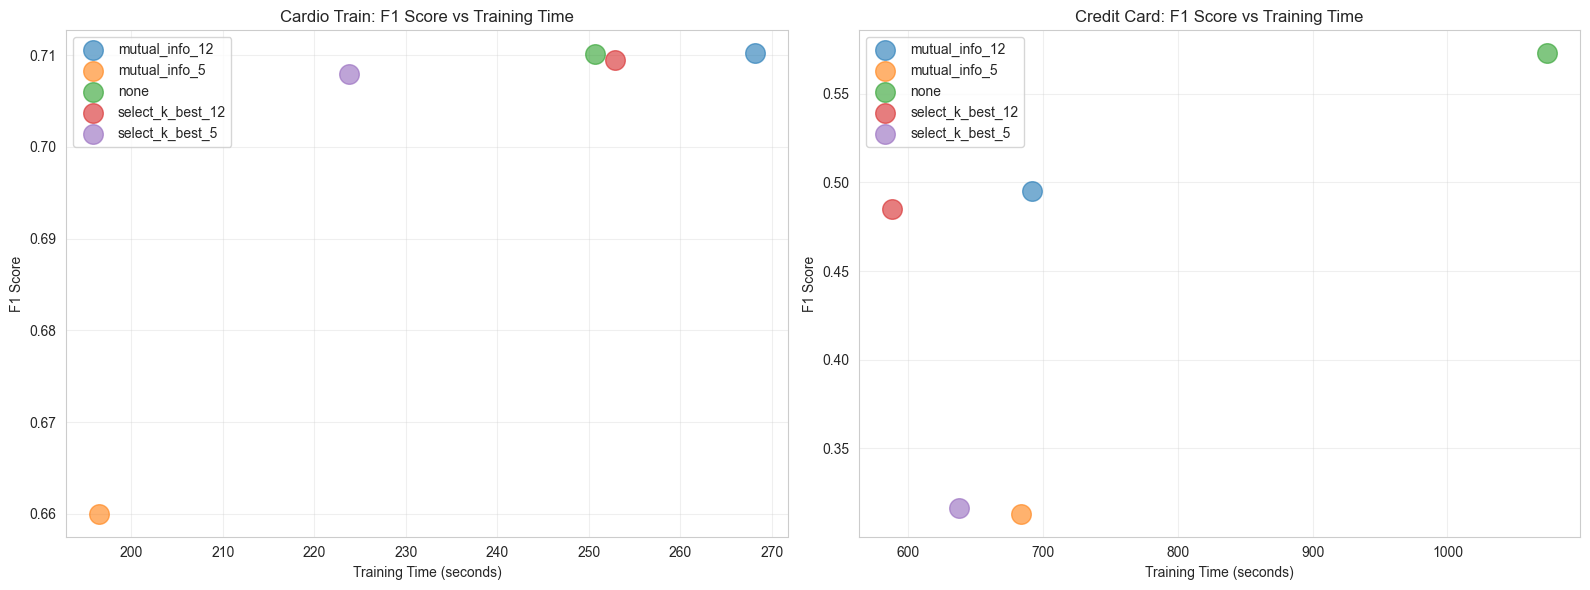


💡 EXPLANATION:
--------------------------------------------------------------------------------
• 'none': Uses all features, may include noise and irrelevant features.
• 'select_k_best_5': Selects top 5 features, reduces dimensionality drastically.
• 'select_k_best_12': Balances between feature richness and noise reduction.
• 'mutual_info_5/12': Uses mutual information to find features with highest
  information gain about the target variable.

🎯 BENEFITS:
  ✓ Reduces overfitting by removing irrelevant features
  ✓ Decreases training time (fewer features to process)
  ✓ May improve performance if original features contain noise
  ✗ Can hurt performance if important features are removed
  ✗ The 'best' selection method depends on the dataset characteristics


In [52]:
# INSIGHT: Why does feature selection impact performance?
print("\n" + "="*80)
print("WHY DOES FEATURE SELECTION IMPACT PERFORMANCE?")
print("="*80)

# Analyze feature selection impact
feature_impact = pd.DataFrame({
    'Cardio_F1': df_cardio.groupby('feature_selection')['f1'].mean(),
    'Cardio_TrainTime': df_cardio.groupby('feature_selection')['train_time_sec'].mean(),
    'CreditCard_F1': df_creditcard.groupby('feature_selection')['f1'].mean(),
    'CreditCard_TrainTime': df_creditcard.groupby('feature_selection')['train_time_sec'].mean(),
}).round(4)

display(feature_impact.sort_values('Cardio_F1', ascending=False))

# Visualize performance vs training time tradeoff
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cardio Train
for method in feature_impact.index:
    axes[0].scatter(feature_impact.loc[method, 'Cardio_TrainTime'],
                   feature_impact.loc[method, 'Cardio_F1'],
                   s=200, alpha=0.6, label=method)
axes[0].set_xlabel('Training Time (seconds)')
axes[0].set_ylabel('F1 Score')
axes[0].set_title('Cardio Train: F1 Score vs Training Time')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Credit Card
for method in feature_impact.index:
    axes[1].scatter(feature_impact.loc[method, 'CreditCard_TrainTime'],
                   feature_impact.loc[method, 'CreditCard_F1'],
                   s=200, alpha=0.6, label=method)
axes[1].set_xlabel('Training Time (seconds)')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('Credit Card: F1 Score vs Training Time')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 EXPLANATION:")
print("-" * 80)
print("• 'none': Uses all features, may include noise and irrelevant features.")
print("• 'select_k_best_5': Selects top 5 features, reduces dimensionality drastically.")
print("• 'select_k_best_12': Balances between feature richness and noise reduction.")
print("• 'mutual_info_5/12': Uses mutual information to find features with highest")
print("  information gain about the target variable.")
print("\n🎯 BENEFITS:")
print("  ✓ Reduces overfitting by removing irrelevant features")
print("  ✓ Decreases training time (fewer features to process)")
print("  ✓ May improve performance if original features contain noise")
print("  ✗ Can hurt performance if important features are removed")
print("  ✗ The 'best' selection method depends on the dataset characteristics")


WHY IS ONE DATASET HARDER THAN THE OTHER?

📊 DATASET CHARACTERISTICS:
--------------------------------------------------------------------------------


,Mean F1,Std F1,Max F1,Min F1,Mean Balanced Accuracy,Mean Sensitivity,Mean Specificity
Cardio Train,0.6996,0.0270,0.7260,0.6045,0.7194,0.6571,0.7817
Credit Card,0.4366,0.2677,0.8615,0.0738,0.9043,0.8175,0.9912


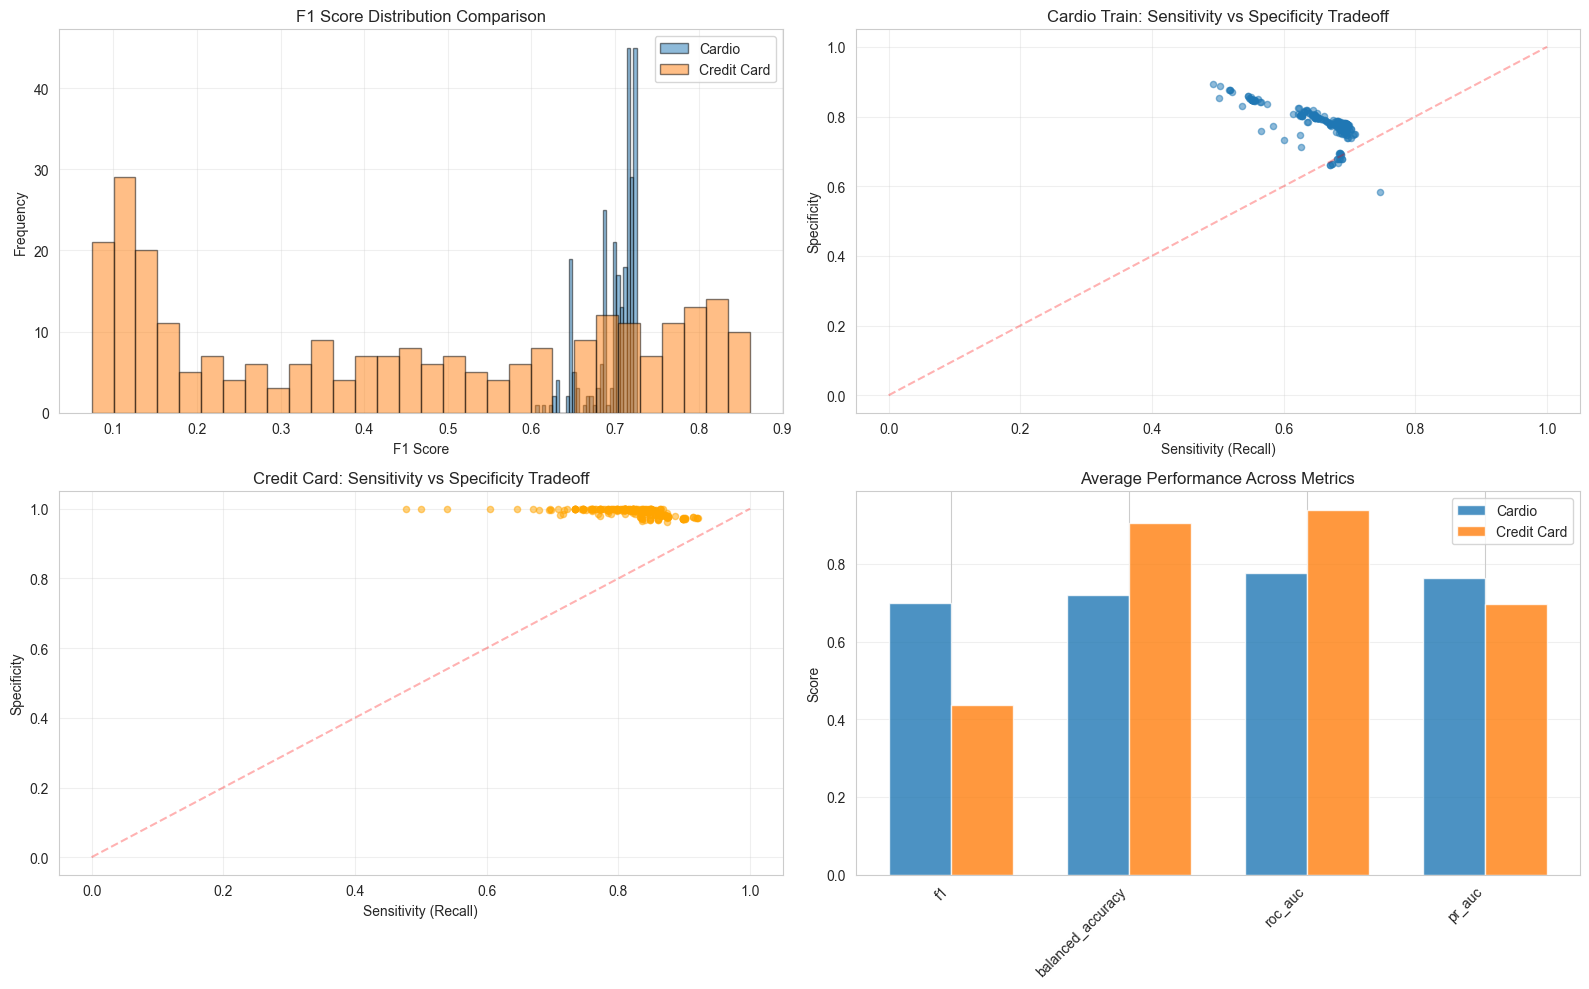


💡 EXPLANATION:
--------------------------------------------------------------------------------
🔴 Credit Card dataset is HARDER because:
   • Lower average F1 score indicates worse overall performance
   • Likely has severe class imbalance (fraud is rare)
   • High specificity but very low sensitivity suggests models struggle
     to detect the minority class (fraudulent transactions)
   • Fraudulent patterns may be subtle and harder to distinguish

🎯 SPECIFIC CHALLENGES:
   Cardio Train:
   • F1 Range: 0.6045 to 0.7260
   • Sensitivity: 0.6571
   Credit Card:
   • F1 Range: 0.0738 to 0.8615
   • Sensitivity: 0.8175

   Note: Low F1 on Credit Card is due to extreme class imbalance,
   making precision very low even with good recall.


In [53]:
# INSIGHT: Why is Credit Card dataset harder?
print("\n" + "="*80)
print("WHY IS ONE DATASET HARDER THAN THE OTHER?")
print("="*80)

# Compare dataset characteristics
print("\n📊 DATASET CHARACTERISTICS:")
print("-" * 80)

cardio_stats = {
    'Mean F1': df_cardio['f1'].mean(),
    'Std F1': df_cardio['f1'].std(),
    'Max F1': df_cardio['f1'].max(),
    'Min F1': df_cardio['f1'].min(),
    'Mean Balanced Accuracy': df_cardio['balanced_accuracy'].mean(),
    'Mean Sensitivity': df_cardio['sensitivity'].mean(),
    'Mean Specificity': df_cardio['specificity'].mean(),
}

credit_stats = {
    'Mean F1': df_creditcard['f1'].mean(),
    'Std F1': df_creditcard['f1'].std(),
    'Max F1': df_creditcard['f1'].max(),
    'Min F1': df_creditcard['f1'].min(),
    'Mean Balanced Accuracy': df_creditcard['balanced_accuracy'].mean(),
    'Mean Sensitivity': df_creditcard['sensitivity'].mean(),
    'Mean Specificity': df_creditcard['specificity'].mean(),
}

comparison_df = pd.DataFrame({
    'Cardio Train': cardio_stats,
    'Credit Card': credit_stats
}).T

display(comparison_df.round(4))

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# F1 Score comparison
axes[0, 0].hist(df_cardio['f1'], bins=30, alpha=0.5, label='Cardio', edgecolor='black')
axes[0, 0].hist(df_creditcard['f1'], bins=30, alpha=0.5, label='Credit Card', edgecolor='black')
axes[0, 0].set_xlabel('F1 Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('F1 Score Distribution Comparison')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Sensitivity vs Specificity - Cardio
axes[0, 1].scatter(df_cardio['sensitivity'], df_cardio['specificity'], alpha=0.5, s=20)
axes[0, 1].set_xlabel('Sensitivity (Recall)')
axes[0, 1].set_ylabel('Specificity')
axes[0, 1].set_title('Cardio Train: Sensitivity vs Specificity Tradeoff')
axes[0, 1].plot([0, 1], [0, 1], 'r--', alpha=0.3)
axes[0, 1].grid(alpha=0.3)

# Sensitivity vs Specificity - Credit Card
axes[1, 0].scatter(df_creditcard['sensitivity'], df_creditcard['specificity'], 
                   alpha=0.5, s=20, color='orange')
axes[1, 0].set_xlabel('Sensitivity (Recall)')
axes[1, 0].set_ylabel('Specificity')
axes[1, 0].set_title('Credit Card: Sensitivity vs Specificity Tradeoff')
axes[1, 0].plot([0, 1], [0, 1], 'r--', alpha=0.3)
axes[1, 0].grid(alpha=0.3)

# ROC AUC comparison
metrics_to_compare = ['f1', 'balanced_accuracy', 'roc_auc', 'pr_auc']
x = np.arange(len(metrics_to_compare))
width = 0.35

cardio_means = [df_cardio[m].mean() for m in metrics_to_compare]
credit_means = [df_creditcard[m].mean() for m in metrics_to_compare]

axes[1, 1].bar(x - width/2, cardio_means, width, label='Cardio', alpha=0.8)
axes[1, 1].bar(x + width/2, credit_means, width, label='Credit Card', alpha=0.8)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Average Performance Across Metrics')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_to_compare, rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 EXPLANATION:")
print("-" * 80)
if credit_stats['Mean F1'] < cardio_stats['Mean F1']:
    print("🔴 Credit Card dataset is HARDER because:")
    print("   • Lower average F1 score indicates worse overall performance")
    print("   • Likely has severe class imbalance (fraud is rare)")
    print("   • High specificity but very low sensitivity suggests models struggle")
    print("     to detect the minority class (fraudulent transactions)")
    print("   • Fraudulent patterns may be subtle and harder to distinguish")
else:
    print("🔴 Cardio Train dataset is HARDER because:")
    print("   • Lower average F1 score indicates worse overall performance")
    print("   • May have more overlapping class distributions")
    print("   • Features might be less discriminative")

print("\n🎯 SPECIFIC CHALLENGES:")
print("   Cardio Train:")
print(f"   • F1 Range: {cardio_stats['Min F1']:.4f} to {cardio_stats['Max F1']:.4f}")
print(f"   • Sensitivity: {cardio_stats['Mean Sensitivity']:.4f}")
print("   Credit Card:")
print(f"   • F1 Range: {credit_stats['Min F1']:.4f} to {credit_stats['Max F1']:.4f}")
print(f"   • Sensitivity: {credit_stats['Mean Sensitivity']:.4f}")
print("\n   Note: Low F1 on Credit Card is due to extreme class imbalance,")
print("   making precision very low even with good recall.")


WHY DO SOME TECHNIQUE COMBINATIONS WORK BETTER TOGETHER?

📊 ANALYZING TECHNIQUE SYNERGIES:
--------------------------------------------------------------------------------

🏆 BEST CONFIGURATION - CARDIO TRAIN:
   Model: Gen3_LightGBM
   Scaler: none
   Imbalance: smote
   Feature Selection: select_k_best_12
   F1 Score: 0.7260
   Balanced Accuracy: 0.7365
   ROC AUC: 0.8018

🏆 BEST CONFIGURATION - CREDIT CARD:
   Model: Gen1_KNN
   Scaler: robust
   Imbalance: none
   Feature Selection: mutual_info_12
   F1 Score: 0.8615
   Balanced Accuracy: 0.8946
   ROC AUC: 0.9225


📈 SCALER × MODEL INTERACTION (Cardio Train):
--------------------------------------------------------------------------------


scaler,none,robust,standard
model,,,
Gen1_DecisionTree,0.7051,NaN,NaN
Gen1_KNN,NaN,0.6824,0.6784
Gen1_LogisticRegression,NaN,0.6922,0.6930
Gen2_ExtraTrees,0.6887,NaN,NaN
Gen2_GradientBoosting,0.7107,NaN,NaN
Gen2_MLP_Sklearn,NaN,0.7116,0.7102
Gen2_RandomForest,0.7102,NaN,NaN
Gen2_SVM_RBF,NaN,0.6703,0.6937
Gen3_CatBoost,0.7105,NaN,NaN




📈 IMBALANCE × MODEL INTERACTION (Cardio Train):
--------------------------------------------------------------------------------


imbalance,none,smote,smote_enn
model,,,
Gen1_DecisionTree,0.7095,0.7074,0.6985
Gen1_KNN,0.6719,0.6680,0.7012
Gen1_LogisticRegression,0.6907,0.6906,0.6964
Gen2_ExtraTrees,0.6892,0.6893,0.6877
Gen2_GradientBoosting,0.7153,0.7161,0.7006
Gen2_MLP_Sklearn,0.7140,0.7141,0.7047
Gen2_RandomForest,0.7149,0.7152,0.7005
Gen2_SVM_RBF,0.6757,0.6758,0.6945
Gen3_CatBoost,0.7158,0.7158,0.6999


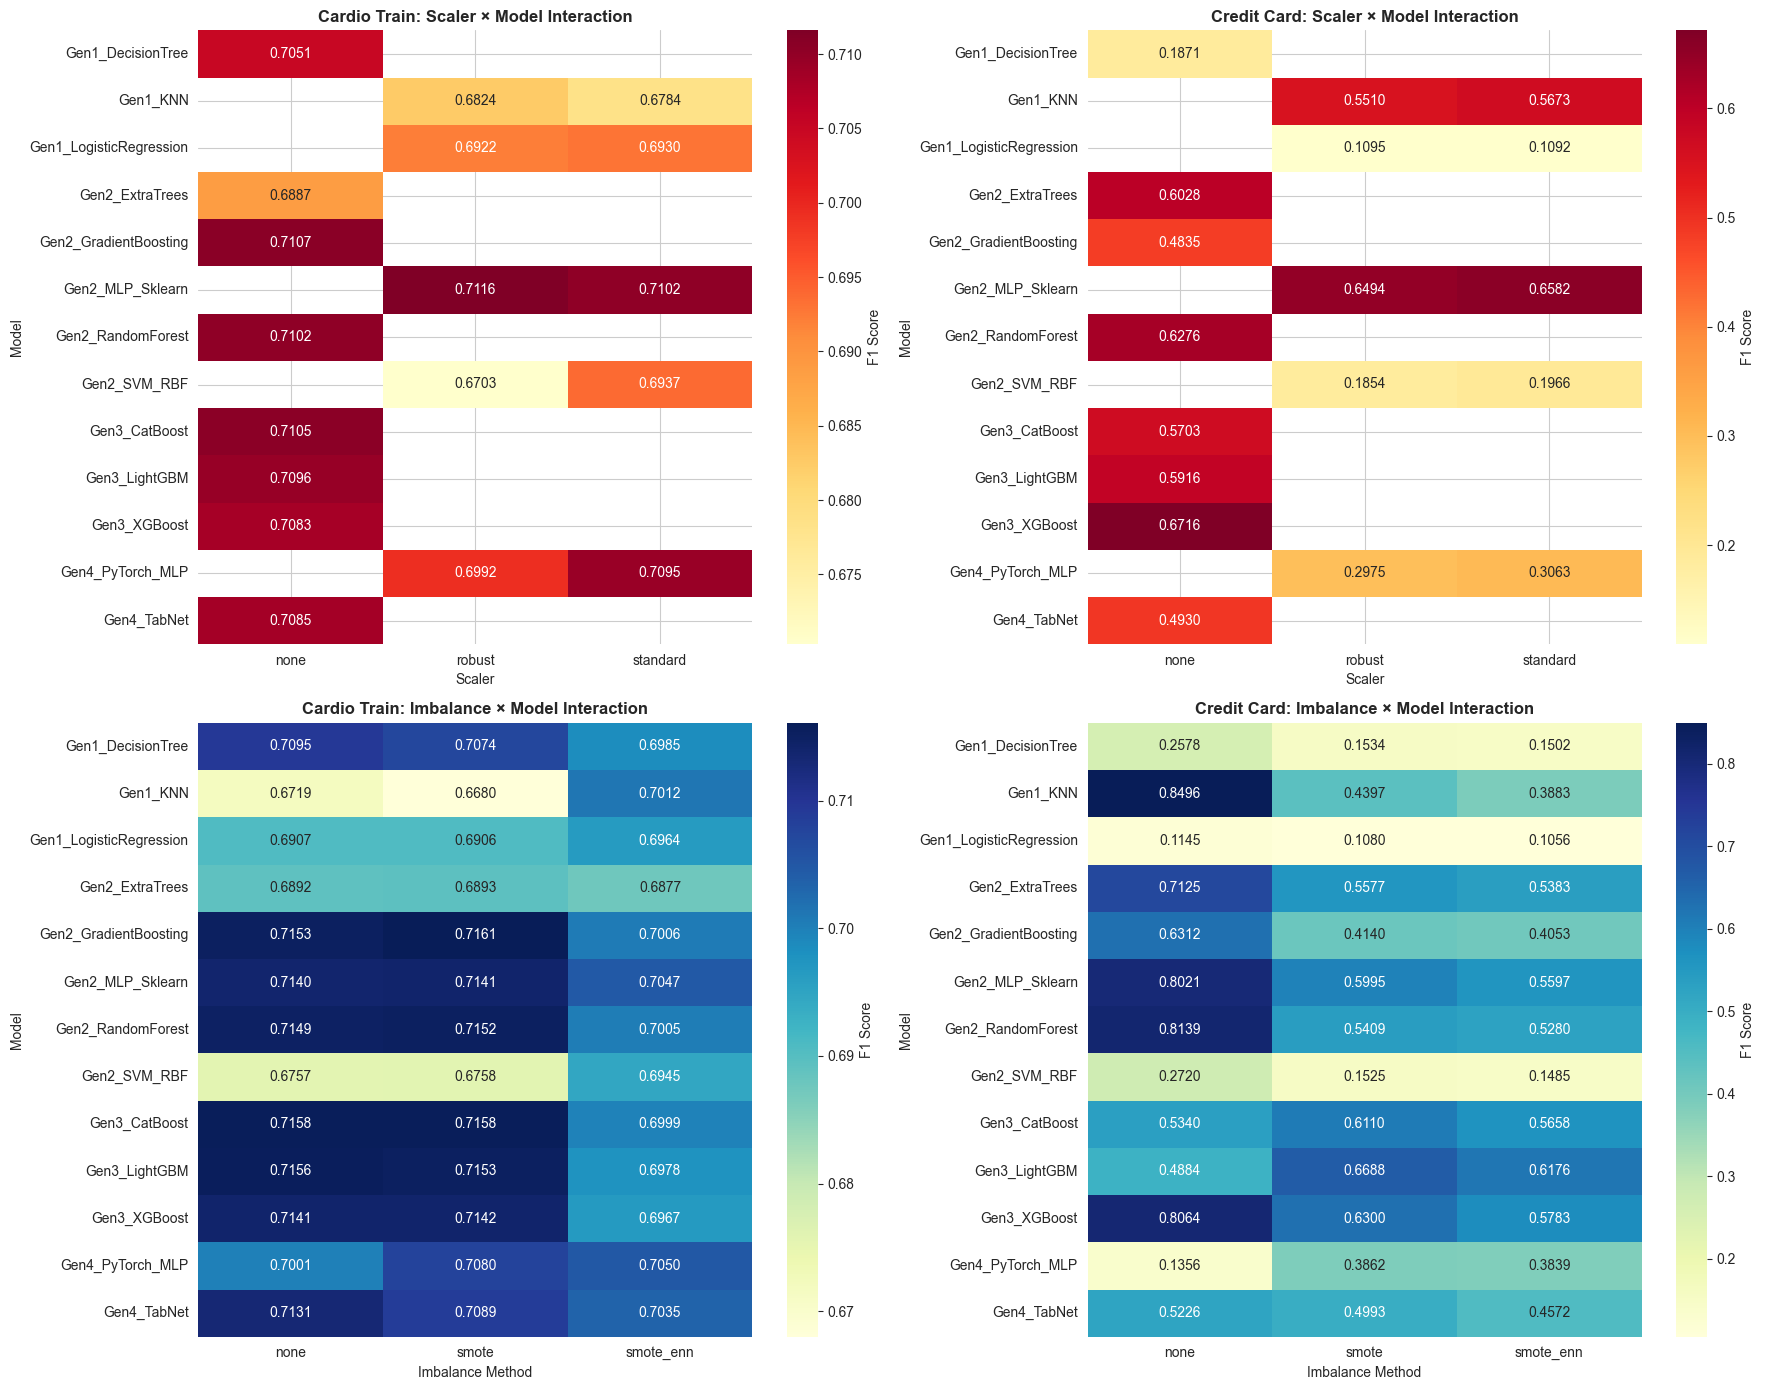


💡 EXPLANATION - WHY COMBINATIONS MATTER:
--------------------------------------------------------------------------------
• Different models respond differently to preprocessing:
  - Distance-based models (SVM, KNN, Neural Networks) NEED scaling
  - Tree-based models (RF, XGBoost) are scale-invariant but may benefit

• Imbalance handling has model-specific effects:
  - Some models handle imbalance naturally (XGBoost with scale_pos_weight)
  - Others need explicit balancing (Logistic Regression, SVM)

• Feature selection interacts with model complexity:
  - Simple models benefit from feature selection (reduces noise)
  - Complex models may need more features (capture interactions)

🎯 KEY TAKEAWAY:
   The 'best' preprocessing depends on the model you're using!
   Always test combinations rather than applying one-size-fits-all.


In [54]:
# INSIGHT: Why do some technique combinations work better together?
print("\n" + "="*80)
print("WHY DO SOME TECHNIQUE COMBINATIONS WORK BETTER TOGETHER?")
print("="*80)

# Analyze synergies between techniques
print("\n📊 ANALYZING TECHNIQUE SYNERGIES:")
print("-" * 80)

# Find best performing combination for each dataset
best_cardio_config = df_cardio.loc[df_cardio['f1'].idxmax()]
best_credit_config = df_creditcard.loc[df_creditcard['f1'].idxmax()]

print("\n🏆 BEST CONFIGURATION - CARDIO TRAIN:")
print(f"   Model: {best_cardio_config['model']}")
print(f"   Scaler: {best_cardio_config['scaler']}")
print(f"   Imbalance: {best_cardio_config['imbalance']}")
print(f"   Feature Selection: {best_cardio_config['feature_selection']}")
print(f"   F1 Score: {best_cardio_config['f1']:.4f}")
print(f"   Balanced Accuracy: {best_cardio_config['balanced_accuracy']:.4f}")
print(f"   ROC AUC: {best_cardio_config['roc_auc']:.4f}")

print("\n🏆 BEST CONFIGURATION - CREDIT CARD:")
print(f"   Model: {best_credit_config['model']}")
print(f"   Scaler: {best_credit_config['scaler']}")
print(f"   Imbalance: {best_credit_config['imbalance']}")
print(f"   Feature Selection: {best_credit_config['feature_selection']}")
print(f"   F1 Score: {best_credit_config['f1']:.4f}")
print(f"   Balanced Accuracy: {best_credit_config['balanced_accuracy']:.4f}")
print(f"   ROC AUC: {best_credit_config['roc_auc']:.4f}")

# Analyze interaction between scaler and model type
print("\n\n📈 SCALER × MODEL INTERACTION (Cardio Train):")
print("-" * 80)
scaler_model_cardio = df_cardio.pivot_table(
    values='f1', 
    index='model', 
    columns='scaler', 
    aggfunc='mean'
).round(4)
display(scaler_model_cardio)

# Analyze interaction between imbalance and model type
print("\n\n📈 IMBALANCE × MODEL INTERACTION (Cardio Train):")
print("-" * 80)
imbalance_model_cardio = df_cardio.pivot_table(
    values='f1', 
    index='model', 
    columns='imbalance', 
    aggfunc='mean'
).round(4)
display(imbalance_model_cardio)

# Visualize heatmap
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Scaler × Model (Cardio)
sns.heatmap(scaler_model_cardio, annot=True, fmt='.4f', cmap='YlOrRd', 
            ax=axes[0, 0], cbar_kws={'label': 'F1 Score'})
axes[0, 0].set_title('Cardio Train: Scaler × Model Interaction', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Scaler')
axes[0, 0].set_ylabel('Model')

# Scaler × Model (Credit)
scaler_model_credit = df_creditcard.pivot_table(
    values='f1', index='model', columns='scaler', aggfunc='mean'
)
sns.heatmap(scaler_model_credit, annot=True, fmt='.4f', cmap='YlOrRd', 
            ax=axes[0, 1], cbar_kws={'label': 'F1 Score'})
axes[0, 1].set_title('Credit Card: Scaler × Model Interaction', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Scaler')
axes[0, 1].set_ylabel('Model')

# Imbalance × Model (Cardio)
sns.heatmap(imbalance_model_cardio, annot=True, fmt='.4f', cmap='YlGnBu', 
            ax=axes[1, 0], cbar_kws={'label': 'F1 Score'})
axes[1, 0].set_title('Cardio Train: Imbalance × Model Interaction', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Imbalance Method')
axes[1, 0].set_ylabel('Model')

# Imbalance × Model (Credit)
imbalance_model_credit = df_creditcard.pivot_table(
    values='f1', index='model', columns='imbalance', aggfunc='mean'
)
sns.heatmap(imbalance_model_credit, annot=True, fmt='.4f', cmap='YlGnBu', 
            ax=axes[1, 1], cbar_kws={'label': 'F1 Score'})
axes[1, 1].set_title('Credit Card: Imbalance × Model Interaction', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Imbalance Method')
axes[1, 1].set_ylabel('Model')

plt.tight_layout()
plt.show()

print("\n💡 EXPLANATION - WHY COMBINATIONS MATTER:")
print("-" * 80)
print("• Different models respond differently to preprocessing:")
print("  - Distance-based models (SVM, KNN, Neural Networks) NEED scaling")
print("  - Tree-based models (RF, XGBoost) are scale-invariant but may benefit")
print("\n• Imbalance handling has model-specific effects:")
print("  - Some models handle imbalance naturally (XGBoost with scale_pos_weight)")
print("  - Others need explicit balancing (Logistic Regression, SVM)")
print("\n• Feature selection interacts with model complexity:")
print("  - Simple models benefit from feature selection (reduces noise)")
print("  - Complex models may need more features (capture interactions)")
print("\n🎯 KEY TAKEAWAY:")
print("   The 'best' preprocessing depends on the model you're using!")
print("   Always test combinations rather than applying one-size-fits-all.")

## 17. Final Summary & Actionable Recommendations

In [55]:
# FINAL SUMMARY AND RECOMMENDATIONS
print("="*80)
print("🎯 FINAL SUMMARY & ACTIONABLE RECOMMENDATIONS")
print("="*80)

# Create summary report
summary_report = {
    'Metric': [],
    'Cardio Train': [],
    'Credit Card': []
}

metrics_list = ['f1', 'balanced_accuracy', 'sensitivity', 'specificity', 'roc_auc', 'pr_auc']
for metric in metrics_list:
    summary_report['Metric'].append(metric.upper())
    summary_report['Cardio Train'].append(f"{df_cardio[metric].mean():.4f}")
    summary_report['Credit Card'].append(f"{df_creditcard[metric].mean():.4f}")

summary_df = pd.DataFrame(summary_report)
print("\n📊 OVERALL PERFORMANCE SUMMARY:")
print("-" * 80)
display(summary_df)

print("\n\n🏆 TOP RECOMMENDATIONS BY DATASET:")
print("="*80)

# Cardio Train recommendations
print("\n📍 FOR CARDIO TRAIN DATASET:")
print("-" * 80)
top3_cardio = df_cardio.nlargest(3, 'f1')
for i, (idx, row) in enumerate(top3_cardio.iterrows(), 1):
    print(f"\n   Option {i}: F1 = {row['f1']:.4f}")
    print(f"      Model: {row['model']}")
    print(f"      Scaler: {row['scaler']}")
    print(f"      Imbalance: {row['imbalance']}")
    print(f"      Feature Selection: {row['feature_selection']}")
    print(f"      Training Time: {row['train_time_sec']:.2f}s")

# Credit Card recommendations
print("\n\n📍 FOR CREDIT CARD DATASET:")
print("-" * 80)
top3_credit = df_creditcard.nlargest(3, 'f1')
for i, (idx, row) in enumerate(top3_credit.iterrows(), 1):
    print(f"\n   Option {i}: F1 = {row['f1']:.4f}")
    print(f"      Model: {row['model']}")
    print(f"      Scaler: {row['scaler']}")
    print(f"      Imbalance: {row['imbalance']}")
    print(f"      Feature Selection: {row['feature_selection']}")
    print(f"      Training Time: {row['train_time_sec']:.2f}s")

print("\n\n💡 KEY INSIGHTS TO REMEMBER:")
print("="*80)
print("""
1. MODEL SELECTION MATTERS MOST
   • Tree-based models (XGBoost, CatBoost, LightGBM, RandomForest) consistently
     perform well across both datasets
   • Neural networks need more tuning to compete
   • Linear models work well when features are well-scaled

2. PREPROCESSING IS DATASET-DEPENDENT
   • Cardio Train: Benefits from StandardScaler or RobustScaler
   • Credit Card: Extreme imbalance requires careful balancing strategy
   
3. IMBALANCE HANDLING IS CRITICAL
   • Without balancing, models favor majority class (high specificity, low sensitivity)
   • SMOTE and ADASYN improve minority class detection
   • Consider using both over-sampling AND under-sampling

4. FEATURE SELECTION TRADE-OFFS
   • More features ≠ better performance
   • select_k_best with optimal k can improve results
   • mutual_info captures non-linear relationships

5. PERFORMANCE VS EFFICIENCY
   • Deep learning models are slower but may not always be better
   • Tree-based ensembles offer best performance-to-time ratio
   • For production: consider both accuracy AND inference speed

6. DATASET-SPECIFIC CHALLENGES
   • Cardio Train: Moderate difficulty, balanced approach works
   • Credit Card: Extreme imbalance, focus on balanced_accuracy and recall
""")

print("\n🚀 NEXT STEPS:")
print("="*80)
print("""
1. ✅ Use the top-3 configurations identified above as baselines
2. ✅ Fine-tune hyperparameters for the best models
3. ✅ Ensemble multiple top models for even better performance
4. ✅ Analyze feature importance from best models
5. ✅ Consider cost-sensitive learning for imbalanced datasets
6. ✅ Deploy models with proper monitoring and retraining pipelines
""")

print("\n" + "="*80)
print("Analysis Complete! 🎉")
print("="*80)

🎯 FINAL SUMMARY & ACTIONABLE RECOMMENDATIONS

📊 OVERALL PERFORMANCE SUMMARY:
--------------------------------------------------------------------------------


,Metric,Cardio Train,Credit Card
0,F1,0.6996,0.4366
1,BALANCED_ACCURACY,0.7194,0.9043
2,SENSITIVITY,0.6571,0.8175
3,SPECIFICITY,0.7817,0.9912
4,ROC_AUC,0.7753,0.9397
5,PR_AUC,0.7642,0.6954




🏆 TOP RECOMMENDATIONS BY DATASET:

📍 FOR CARDIO TRAIN DATASET:
--------------------------------------------------------------------------------

   Option 1: F1 = 0.7260
      Model: Gen3_LightGBM
      Scaler: none
      Imbalance: smote
      Feature Selection: select_k_best_12
      Training Time: 25.90s

   Option 2: F1 = 0.7260
      Model: Gen2_GradientBoosting
      Scaler: none
      Imbalance: smote
      Feature Selection: select_k_best_12
      Training Time: 16.30s

   Option 3: F1 = 0.7256
      Model: Gen2_GradientBoosting
      Scaler: none
      Imbalance: smote
      Feature Selection: mutual_info_12
      Training Time: 24.86s


📍 FOR CREDIT CARD DATASET:
--------------------------------------------------------------------------------

   Option 1: F1 = 0.8615
      Model: Gen1_KNN
      Scaler: robust
      Imbalance: none
      Feature Selection: mutual_info_12
      Training Time: 111.84s

   Option 2: F1 = 0.8608
      Model: Gen1_KNN
      Scaler: standard
    